## Modelo Predictivo - Procesamiento y EDA

Usando los datos de **autocasion.csv** vamos a realizar **procesamiento** y **EDA**.

El objetivo es procesar los datos del **.csv** para tener un conjunto de datos que solo contenga números.

Los datos que vamos a procesar fueron extraidos de la página de coches: [autocasion.com](https://www.autocasion.com/)

### Procesamiento (Parte 1)
- **NaN's**: Calcula la cantidad de NaN's es porcentaje de cada columna. Elimina los NaN's de la columna _**precio**_ unicamente.

- **Columnas**:

    - **Fecha de matriculación**: Devidide esta columna en 2. Una para los meses y otra para los años. El tipo de dato de cada columna debe ser **int**.
    - **Kilómetros**: Transforma esta columna a tipo **float**.
    - **Potencia (cv)**: Transforma esta columna a tipo **float**.
    - **Garantía**: Transforma esta columna a tipo **float**. Los elementos _"Sí"_ son NaN's y los elementos _"No"_ son 0.
    - **Color**: Limpia esta columna como mejor te parezca.
    - **largo**: Transforma esta columna a tipo **float**.
    - **ancho**: Transforma esta columna a tipo **float**.
    - **alto**: Transforma esta columna a tipo **float**.
    - **maletero_l**: Divide esta columna en 2 columnas. El tipo de dato de cada una debe ser **float**. Llamalas **maletero_1** y **maletero_2** respectivamente.
    - **puertas**: Transforma esta columna a tipo **float**.
    - **sobrealimentacion**: Transforma lo _"-"_ a NaN.
    - **urbano**: Transforma esta columna a tipo **float**.
    - **carretera**: Transforma esta columna a tipo **float**.
    - **medio**: Transforma esta columna a tipo **float**.
    - **co2**: Transforma esta columna a tipo **float**.
    - **deposito**: Transforma esta columna a tipo **float**.
    - **precio**: Transforma esta columna a tipo **float**.
      
### Exploratory Data Analysis
- Define una función que tome como parámetro una columna del DataFrame y que muestre visualizaciones dependiendo del tipo de dato:
    - **Categórica**: Debe mostrar un gráfico de barras para ver la distribución de esa columna, y un boxplot con la columna _**precio**_.
    - **Continua**: Debe mostrar un histograma y un boxplot para ver la distribución de esa columna, y un scatterplot con la columna _**precio**_.
 
### Procesamiento (Parte 2)

- **Columnas Continuas**:

    - **Outliers**: Usando las gráficas del punto anterior usa la **Valla de Tukey** o el **Z-Score** para eliminar outliers.
 
- **Columnas Categóricas**:

    - Usar _**LabelEncoder()**_ de la librería **scikit-learn** para transformar las columnas que tengan 2 categorías. Recuerda no eliminar NaN's.
    - Usar _**OneHotEncoder()**_ de la librería **scikit-learn** para transformar las columnas que tengan más de 2 categorías. Recuerda no eliminar NaN's.
    - Usa _**KNNImputer()**_ de la librería **scikit-learn** para llenar los NaN's de cada columna.
- Genera un gráfico de correlación. ¿Que columnas están más correladas con la columna _**precio**_?

### Feature Importance
- Usa el código de clase para mostrar la importancia de las columnas del DataFrame con respecto a la columna _**precio**_.
- Cambia el modelo por _**RandomForestRegressor()**_.


Guarda el DataFrame en un **.csv**, llama al archivo: _**autocasion_procesado.csv**_.

In [2]:
!pip install --upgrade scikit-learn

In [6]:
!pip install summarytools

In [7]:
import pandas as pd
from summarytools import dfSummary

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestRegressor

import numpy as np
from scipy import stats


ModuleNotFoundError: No module named 'summarytools'

In [8]:
df = pd.read_csv("../Semana_9/autocasion.csv")

df.head(10)

C:\Users\Tato\AppData\Local\Temp\ipykernel_3748\1586905594.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Semana_9/autocasion.csv")


Fecha de matriculación Kilómetros      Cambio Potencia (cv)  Garantía  \
0                02/2023   3.900 km      Manual           179  12 meses   
1                06/2023   4.000 km      Manual           180  24 meses   
2                09/2023       1 km  Automático           154  36 meses   
3                10/2023       7 km  Automático           154  36 meses   
4                08/2023      10 km  Automático           154  36 meses   
5                08/2023      10 km  Automático           154  36 meses   
6                08/2023      10 km  Automático           154  36 meses   
7                05/2023      10 km      Manual           140  36 meses   
8                06/2023      10 km      Manual           140  36 meses   
9                01/2023      10 km      Manual           180  12 meses   

                                               Color Distintivo ambiental  \
0                                              Negro                    C   
1                                               Gris                    C   
2  Azul Poisson (metalizado)\n                   ...          0 EMISIONES   
3                                     PUNKN METALLIC          0 EMISIONES   
4                                              Verde          0 EMISIONES   
5                                              Verde          0 EMISIONES   
6                                              Verde          0 EMISIONES   
7                               Blanco Gara (pastel)                    C   
8  Negro Scorpione metalizado\n                  ...                    C   
9          Blanco\n                     / Metalizado                    C   

     largo    ancho     alto  ...          combustible cilindrada_cm3  \
0      NaN      NaN      NaN  ...                  NaN            NaN   
1      NaN      NaN      NaN  ...                  NaN            NaN   
2  3673 mm  1682 mm  1518 mm  ...  Corriente eléctrica          0.000   
3  3673 mm  1682 mm  1518 mm  ...  Corriente eléctrica          0.000   
4  3673 mm  1682 mm  1518 mm  ...  Corriente eléctrica          0.000   
5  3673 mm  1682 mm  1518 mm  ...  Corriente eléctrica          0.000   
6  3673 mm  1682 mm  1518 mm  ...  Corriente eléctrica          0.000   
7  3657 mm  1627 mm  1480 mm  ...             Gasolina          1.368   
8  3657 mm  1627 mm  1480 mm  ...             Gasolina          1.368   
9      NaN      NaN      NaN  ...                  NaN            NaN   

   cilindros sobrealimentacion urbano  carretera medio  co2  deposito  \
0        NaN               NaN    NaN        NaN   NaN  NaN       NaN   
1        NaN               NaN    NaN        NaN   NaN  NaN       NaN   
2        NaN             Turbo   0,00       0,00  0,00    -      0,00   
3        NaN             Turbo   0,00       0,00  0,00    -      0,00   
4        NaN             Turbo   0,00       0,00  0,00    -      0,00   
5        NaN             Turbo   0,00       0,00  0,00    -      0,00   
6        NaN             Turbo   0,00       0,00  0,00    -      0,00   
7        4.0             Turbo   7,90       4,90  6,00  139     35,00   
8        4.0             Turbo   7,90       4,90  6,00  139     35,00   
9        NaN               NaN    NaN        NaN   NaN  NaN       NaN   

     precio  
0  29.000 €  
1  30.500 €  
2  43.800 €  
3  38.990 €  
4  35.990 €  
5  35.990 €  
6  35.990 €  
7  33.400 €  
8  33.900 €  
9  28.880 €  

[10 rows x 26 columns]

In [9]:
dfSummary(df)

In [5]:
df.shape

(106431, 26)

In [6]:
df.describe()

batalla_mm  peso_masa_kg        plazas  cilindrada_cm3     cilindros
count  78550.000000  78550.000000  78550.000000    78550.000000  76121.000000
mean    2665.759427   1982.244889      4.925029      131.312300      4.053244
std      181.552995    386.849738      0.621449      333.903894      1.142300
min        0.000000      0.000000      2.000000        0.000000      2.000000
25%     2583.000000   1750.000000      5.000000        1.497000      4.000000
50%     2655.000000   1925.000000      5.000000        1.896000      4.000000
75%     2734.000000   2150.000000      5.000000        2.400000      4.000000
max     4575.000000   3500.000000      9.000000      999.000000     16.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106431 entries, 0 to 106430
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Fecha de matriculación  106404 non-null  object 
 1   Kilómetros              106404 non-null  object 
 2   Cambio                  106364 non-null  object 
 3   Potencia (cv)           106404 non-null  object 
 4   Garantía                100572 non-null  object 
 5   Color                   106404 non-null  object 
 6   Distintivo ambiental    98035 non-null   object 
 7   largo                   78550 non-null   object 
 8   ancho                   78550 non-null   object 
 9   alto                    78550 non-null   object 
 10  batalla_mm              78550 non-null   float64
 11  maletero_l              78550 non-null   object 
 12  peso_masa_kg            78550 non-null   float64
 13  carroceria              78550 non-null   object 
 14  puertas             

## Procesamiento (Parte 1)

In [8]:
#NaN's: Calcula la cantidad de NaN's es porcentaje de cada columna. 
df.isna().sum()/df.shape[0]*100

Fecha de matriculación     0.025369
Kilómetros                 0.025369
Cambio                     0.062952
Potencia (cv)              0.025369
Garantía                   5.504975
Color                      0.025369
Distintivo ambiental       7.888679
largo                     26.196315
ancho                     26.196315
alto                      26.196315
batalla_mm                26.196315
maletero_l                26.196315
peso_masa_kg              26.196315
carroceria                26.196315
puertas                   26.196315
plazas                    26.196315
combustible               26.196315
cilindrada_cm3            26.196315
cilindros                 28.478545
sobrealimentacion         26.196315
urbano                    26.196315
carretera                 26.196315
medio                     26.196315
co2                       26.196315
deposito                  26.196315
precio                     0.025369
dtype: float64

In [9]:
df['precio'].isnull().sum()

27

In [10]:
df['precio'] = df['precio'].apply(lambda x : np.nan if x == 'Consultar' or x == '' else x)
df['precio'] = df['precio'].str.replace('.','').str.replace('€','').str.strip()
df['precio'] = df['precio'].astype('float')

In [11]:
#Elimina los NaN's de la columna precio unicamente.
df = df.dropna(subset = "precio").reset_index(drop = True)

In [12]:
df['precio'].isnull().sum()

0

In [13]:
# Fecha de matriculación: Devidide esta columna en 2. Una para los meses y otra para los años. El tipo de dato de cada columna debe ser int.

In [14]:
df['Fecha de matriculación']

0         02/2023
1         06/2023
2         09/2023
3         10/2023
4         08/2023
           ...   
106366    12/2020
106367    01/2021
106368    03/2009
106369    01/2007
106370    10/2021
Name: Fecha de matriculación, Length: 106371, dtype: object

In [15]:
df[['mes','año']] = df['Fecha de matriculación'].str.split('/', expand= True)

In [16]:
df['mes']

0         02
1         06
2         09
3         10
4         08
          ..
106366    12
106367    01
106368    03
106369    01
106370    10
Name: mes, Length: 106371, dtype: object

In [17]:
df['mes'] = df['mes'].astype(int)


In [18]:
df['año']

0         2023
1         2023
2         2023
3         2023
4         2023
          ... 
106366    2020
106367    2021
106368    2009
106369    2007
106370    2021
Name: año, Length: 106371, dtype: object

In [19]:
df.shape

(106371, 28)

In [20]:
df = df.dropna(subset =['año'])

In [21]:
df['año'] = df['año'].astype(int)

In [22]:
#Transforma estas columnas 'Kilómetros','largo', 'ancho', 'alto' a tipo float.

In [23]:
# Definimos la función para extraer la parte numérica
def extract_numero(x):
    return x.str.extract('(\d+)', expand=False).astype(float)

columnas_a_procesar = ['Kilómetros','largo', 'ancho', 'alto', 'co2','medio']

for columna in columnas_a_procesar:
    df[columna] = extract_numero(df[columna])

print(df)

       Fecha de matriculación  Kilómetros      Cambio Potencia (cv)  Garantía  \
0                     02/2023         3.0      Manual           179  12 meses   
1                     06/2023         4.0      Manual           180  24 meses   
2                     09/2023         1.0  Automático           154  36 meses   
3                     10/2023         7.0  Automático           154  36 meses   
4                     08/2023        10.0  Automático           154  36 meses   
...                       ...         ...         ...           ...       ...   
106366                12/2020        31.0  Automático           390  12 meses   
106367                01/2021        39.0  Automático           390  12 meses   
106368                03/2009         6.0  Automático           343        No   
106369                01/2007         8.0      Manual           367        No   
106370                10/2021         2.0  Automático            20  24 meses   

                           

In [24]:
df.shape

(106081, 28)

In [25]:
#Transforma estas columnas 'urbano','Potencia (cv)','carretera','medio','deposito' a tipo float.

In [26]:
def coma_por_punto(x):
    x = x.str.replace('[^0-9,\.]+', '', regex=True).str.replace(',', '.')
    
    x = x.replace('', np.nan)  # Replace empty strings with NaN
    
    return x.astype(float)

columnas_a_modificar = ['urbano','Potencia (cv)','carretera','deposito']

for columna in columnas_a_modificar:
    df[columna] = coma_por_punto(df[columna])

print(df)

       Fecha de matriculación  Kilómetros      Cambio  Potencia (cv)  \
0                     02/2023         3.0      Manual          179.0   
1                     06/2023         4.0      Manual          180.0   
2                     09/2023         1.0  Automático          154.0   
3                     10/2023         7.0  Automático          154.0   
4                     08/2023        10.0  Automático          154.0   
...                       ...         ...         ...            ...   
106366                12/2020        31.0  Automático          390.0   
106367                01/2021        39.0  Automático          390.0   
106368                03/2009         6.0  Automático          343.0   
106369                01/2007         8.0      Manual          367.0   
106370                10/2021         2.0  Automático           20.0   

        Garantía                                              Color  \
0       12 meses                                              Ne

In [27]:
df.shape

(106081, 28)

In [28]:
#puertas: Transforma esta columna a tipo float.

In [29]:
df = df[df['puertas'] != '-']

In [30]:
df['puertas'] = df['puertas'].astype(float)

In [31]:
df.shape

(106080, 28)

In [32]:
df['puertas'].isnull().sum()

27815

In [33]:
#Garantía: Transforma esta columna a tipo float. Los elementos "Sí" son NaN's y los elementos "No" son 0.

In [34]:
df['Garantía'] = df['Garantía'].str.extract('(\d+)', expand=False).astype(float)

In [35]:
df['Garantía'] = df['Garantía'].replace({'Sí': None, 'No': 0})

In [36]:
df["Garantía"]

0         12.0
1         24.0
2         36.0
3         36.0
4         36.0
          ... 
106366    12.0
106367    12.0
106368     NaN
106369     NaN
106370    24.0
Name: Garantía, Length: 106080, dtype: float64

In [37]:
#maletero_l: Divide esta columna en 2 columnas. El tipo de dato de cada una debe ser float. Llamalas maletero_1 y maletero_2 respectivamente.

In [38]:
df[['maletero_1' ,'maletero_2']] = df['maletero_l'].str.split('/', expand = True).astype(float)

In [39]:
#sobrealimentacion: Transforma lo "-" a NaN.

In [40]:
df['sobrealimentacion'] = df['sobrealimentacion'].replace('-', None)

In [41]:
df

Fecha de matriculación  Kilómetros      Cambio  Potencia (cv)  \
0                     02/2023         3.0      Manual          179.0   
1                     06/2023         4.0      Manual          180.0   
2                     09/2023         1.0  Automático          154.0   
3                     10/2023         7.0  Automático          154.0   
4                     08/2023        10.0  Automático          154.0   
...                       ...         ...         ...            ...   
106366                12/2020        31.0  Automático          390.0   
106367                01/2021        39.0  Automático          390.0   
106368                03/2009         6.0  Automático          343.0   
106369                01/2007         8.0      Manual          367.0   
106370                10/2021         2.0  Automático           20.0   

        Garantía                                              Color  \
0           12.0                                              Negro   
1           24.0                                               Gris   
2           36.0  Azul Poisson (metalizado)\n                   ...   
3           36.0                                     PUNKN METALLIC   
4           36.0                                              Verde   
...          ...                                                ...   
106366      12.0                                         DEMIN BLUE   
106367      12.0     MAPLE BROWN\n                     / Metalizado   
106368       NaN                                             Blanco   
106369       NaN                                              Negro   
106370      24.0                                     PROTOTYPE GREY   

       Distintivo ambiental   largo   ancho    alto  ...  urbano carretera  \
0                         C     NaN     NaN     NaN  ...     NaN       NaN   
1                         C     NaN     NaN     NaN  ...     NaN       NaN   
2               0 EMISIONES  3673.0  1682.0  1518.0  ...     0.0       0.0   
3               0 EMISIONES  3673.0  1682.0  1518.0  ...     0.0       0.0   
4               0 EMISIONES  3673.0  1682.0  1518.0  ...     0.0       0.0   
...                     ...     ...     ...     ...  ...     ...       ...   
106366          0 EMISIONES  4950.0  2008.0  1776.0  ...     0.0       0.0   
106367          0 EMISIONES  4950.0  2008.0  1776.0  ...     0.0       0.0   
106368                    C     NaN     NaN     NaN  ...     NaN       NaN   
106369                    C     NaN     NaN     NaN  ...     NaN       NaN   
106370          0 EMISIONES     NaN     NaN     NaN  ...     NaN       NaN   

        medio   co2  deposito    precio mes   año  maletero_1 maletero_2  
0         NaN   NaN       NaN   29000.0   2  2023         NaN        NaN  
1         NaN   NaN       NaN   30500.0   6  2023         NaN        NaN  
2         0.0   NaN       0.0   43800.0   9  2023       185.0      550.0  
3         0.0   NaN       0.0   38990.0  10  2023       185.0      550.0  
4         0.0   NaN       0.0   35990.0   8  2023       185.0      550.0  
...       ...   ...       ...       ...  ..   ...         ...        ...  
106366    2.0  48.0      70.0   61500.0  12  2020       640.0        0.0  
106367    2.0  48.0      70.0   59890.0   1  2021       640.0        0.0  
106368    NaN   NaN       NaN  209900.0   3  2009         NaN        NaN  
106369    NaN   NaN       NaN  189900.0   1  2007         NaN        NaN  
106370    NaN   NaN       NaN   12490.0  10  2021         NaN        NaN  

[106080 rows x 30 columns]

In [42]:
df.isna().sum()/df.shape[0]*100

Fecha de matriculación     0.000000
Kilómetros                 0.000000
Cambio                     0.037707
Potencia (cv)              2.005090
Garantía                  14.891591
Color                      0.000000
Distintivo ambiental       7.844080
largo                     26.490385
ancho                     26.263198
alto                      26.497926
batalla_mm                26.220777
maletero_l                26.220777
peso_masa_kg              26.220777
carroceria                26.220777
puertas                   26.220777
plazas                    26.220777
combustible               26.220777
cilindrada_cm3            26.220777
cilindros                 28.505845
sobrealimentacion         42.626320
urbano                    26.220777
carretera                 26.220777
medio                     26.220777
co2                       44.308069
deposito                  26.220777
precio                     0.000000
mes                        0.000000
año                        0

In [43]:
df[['urbano','Potencia (cv)','carretera','medio','deposito','maletero_1' ,'maletero_2','Kilómetros','largo', 'ancho', 'alto','mes','año','sobrealimentacion','co2','medio','puertas','maletero_1','maletero_2']]

urbano  Potencia (cv)  carretera  medio  deposito  maletero_1  \
0          NaN          179.0        NaN    NaN       NaN         NaN   
1          NaN          180.0        NaN    NaN       NaN         NaN   
2          0.0          154.0        0.0    0.0       0.0       185.0   
3          0.0          154.0        0.0    0.0       0.0       185.0   
4          0.0          154.0        0.0    0.0       0.0       185.0   
...        ...            ...        ...    ...       ...         ...   
106366     0.0          390.0        0.0    2.0      70.0       640.0   
106367     0.0          390.0        0.0    2.0      70.0       640.0   
106368     NaN          343.0        NaN    NaN       NaN         NaN   
106369     NaN          367.0        NaN    NaN       NaN         NaN   
106370     NaN           20.0        NaN    NaN       NaN         NaN   

        maletero_2  Kilómetros   largo   ancho    alto  mes   año  \
0              NaN         3.0     NaN     NaN     NaN    2  2023   
1              NaN         4.0     NaN     NaN     NaN    6  2023   
2            550.0         1.0  3673.0  1682.0  1518.0    9  2023   
3            550.0         7.0  3673.0  1682.0  1518.0   10  2023   
4            550.0        10.0  3673.0  1682.0  1518.0    8  2023   
...            ...         ...     ...     ...     ...  ...   ...   
106366         0.0        31.0  4950.0  2008.0  1776.0   12  2020   
106367         0.0        39.0  4950.0  2008.0  1776.0    1  2021   
106368         NaN         6.0     NaN     NaN     NaN    3  2009   
106369         NaN         8.0     NaN     NaN     NaN    1  2007   
106370         NaN         2.0     NaN     NaN     NaN   10  2021   

       sobrealimentacion   co2  medio  puertas  maletero_1  maletero_2  
0                    NaN   NaN    NaN      NaN         NaN         NaN  
1                    NaN   NaN    NaN      NaN         NaN         NaN  
2                  Turbo   NaN    0.0      3.0       185.0       550.0  
3                  Turbo   NaN    0.0      3.0       185.0       550.0  
4                  Turbo   NaN    0.0      3.0       185.0       550.0  
...                  ...   ...    ...      ...         ...         ...  
106366             Turbo  48.0    2.0      5.0       640.0         0.0  
106367             Turbo  48.0    2.0      5.0       640.0         0.0  
106368               NaN   NaN    NaN      NaN         NaN         NaN  
106369               NaN   NaN    NaN      NaN         NaN         NaN  
106370               NaN   NaN    NaN      NaN         NaN         NaN  

[106080 rows x 19 columns]

## Exploratory Data Analysis

In [46]:
def visualizacion_graficas(df, nombre_columna, columna_precio):
    
    column = df[nombre_columna]
    if column.dtype == 'object': 
        fig, axes = plt.subplots(1, 2, figsize = (12, 3))
        sns.countplot(x=column, ax=axes[0])
        axes[0].set_title(f"Distribución de {nombre_columna}")
        axes[0].set_xlabel(nombre_columna)
        axes[0].set_ylabel("Frecuencia")
        plt.setp(axes[0].get_xticklabels(), rotation=45)

        sns.boxplot(x=column, y=df[columna_precio], ax=axes[1])
        axes[1].set_title(f"Boxplot de {nombre_columna} vs {columna_precio}")
        axes[1].set_xlabel(nombre_columna)
        axes[1].set_ylabel(columna_precio)
        plt.setp(axes[1].get_xticklabels(), rotation=45)
        plt.tight_layout()
        plt.show()
    
    else:  
        fig, axes = plt.subplots(1, 3, figsize = (12, 3))
        sns.histplot(column, kde=True, ax=axes[0])
        axes[0].set_title(f"Distribución de {nombre_columna}")
        axes[0].set_xlabel(nombre_columna)
        axes[0].set_ylabel("Frecuencia")

        sns.boxplot(x=column, ax=axes[1])
        axes[1].set_title(f"Boxplot de {nombre_columna}")
        axes[1].set_xlabel(nombre_columna)
        axes[1].set_ylabel("Valor")

        sns.scatterplot(x=column, y=df[columna_precio], ax=axes[2])
        axes[2].set_title(f"Scatterplot de {nombre_columna} vs {columna_precio}")
        axes[2].set_xlabel(nombre_columna)
        axes[2].set_ylabel(columna_precio)
        plt.show()

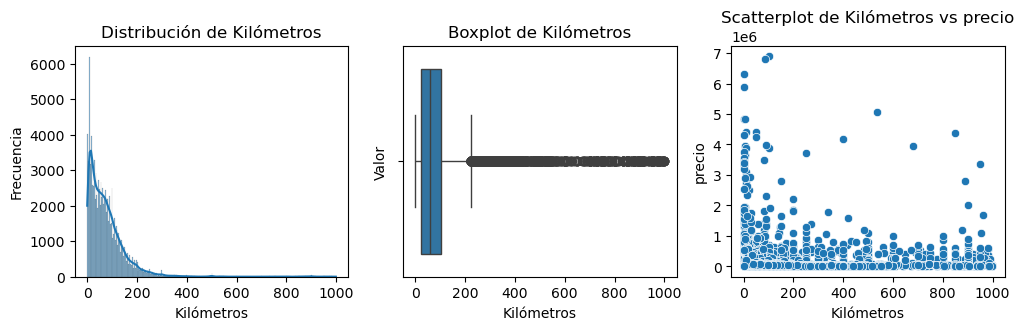

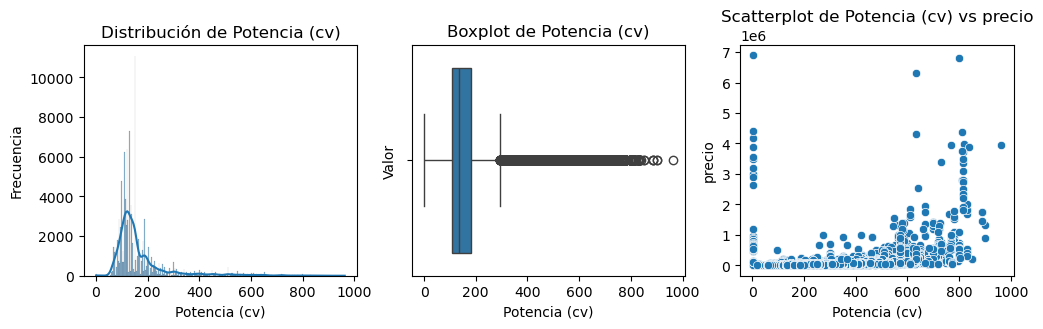

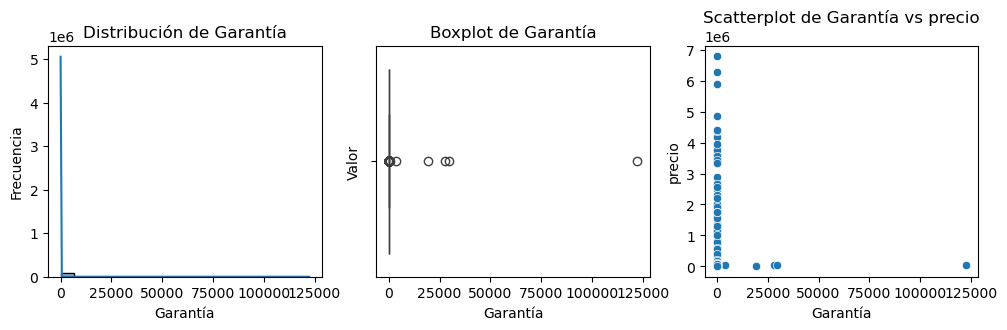

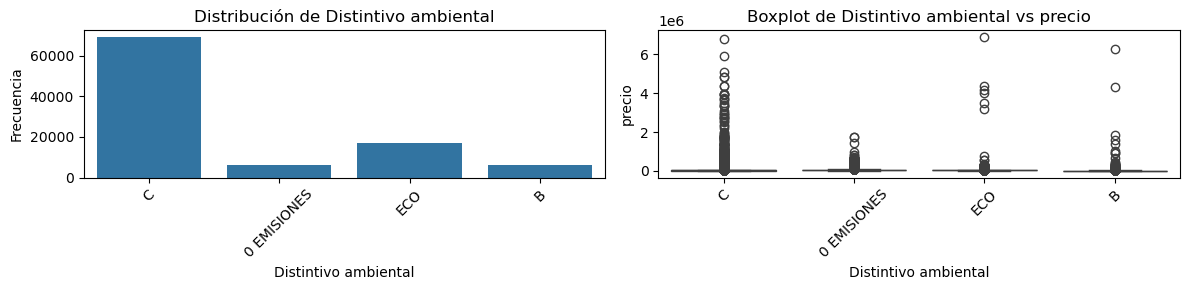

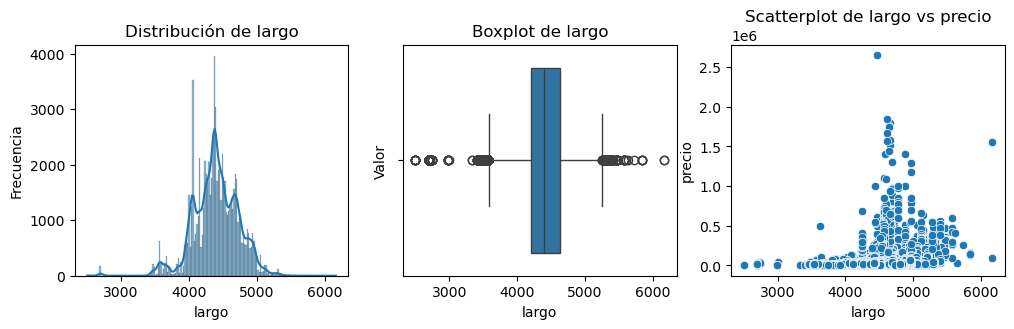

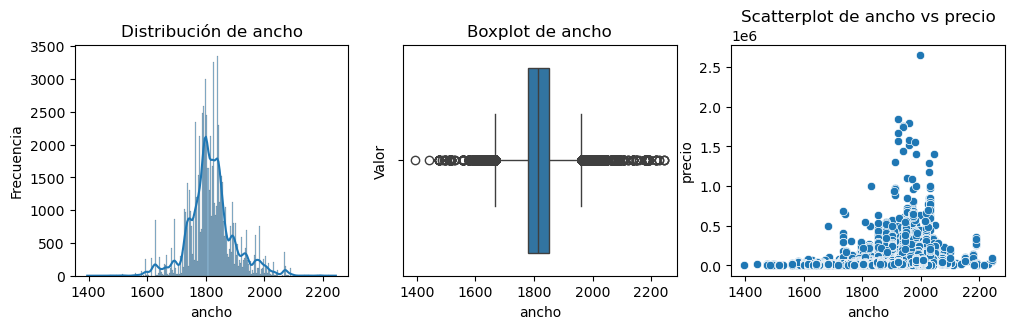

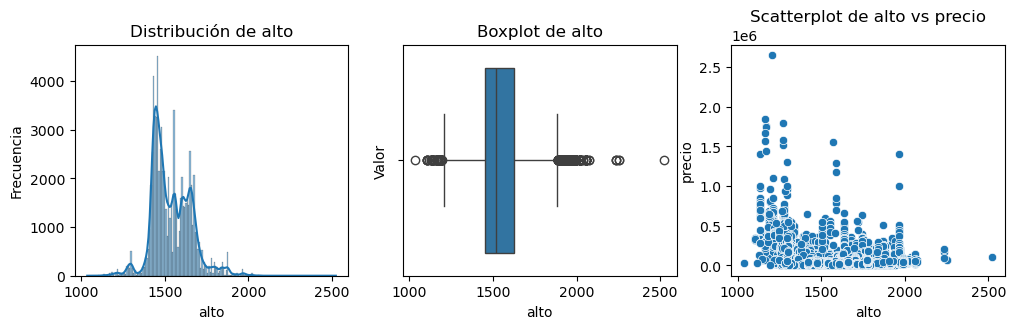

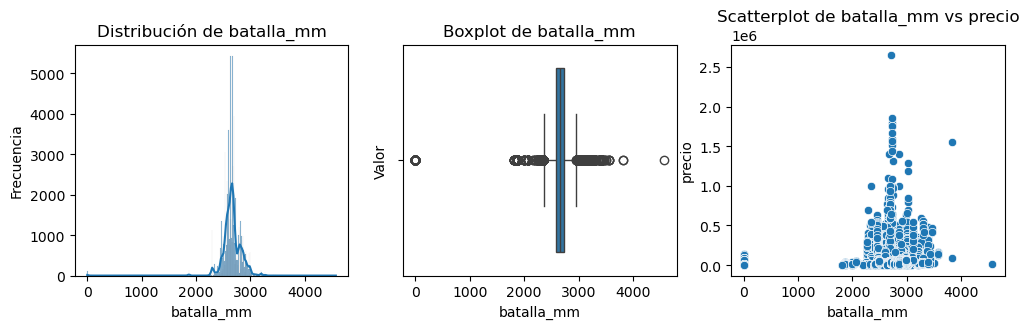

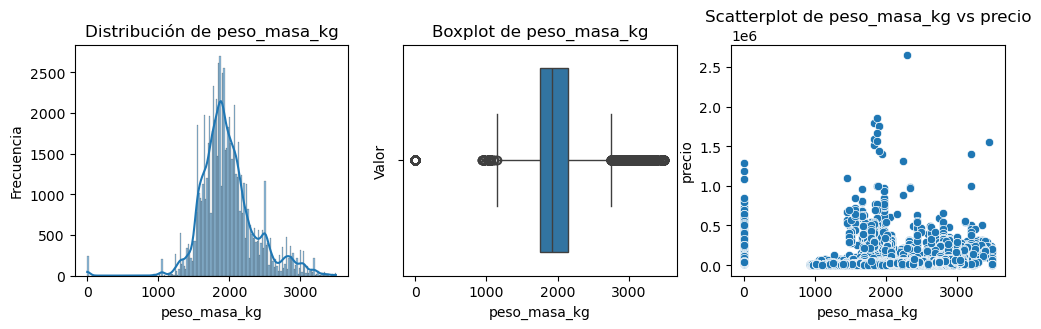

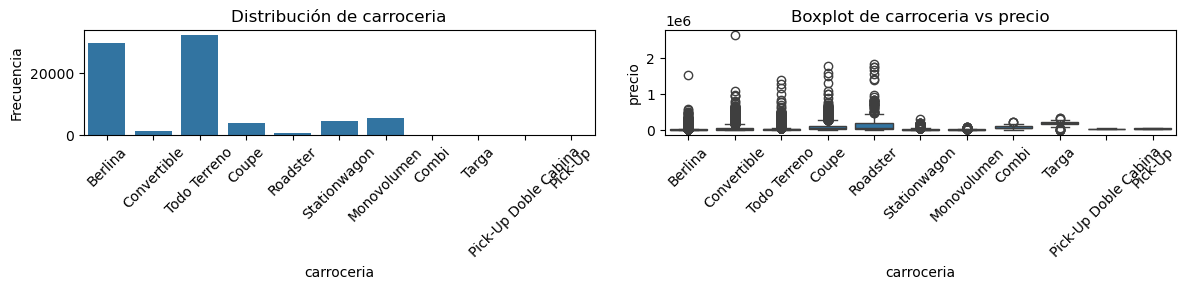

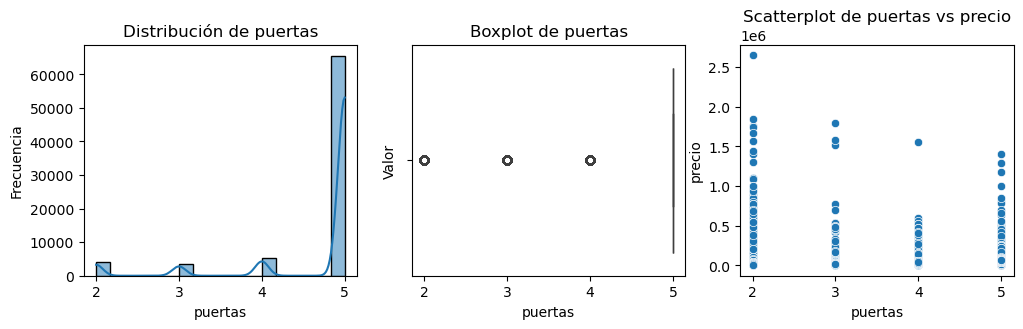

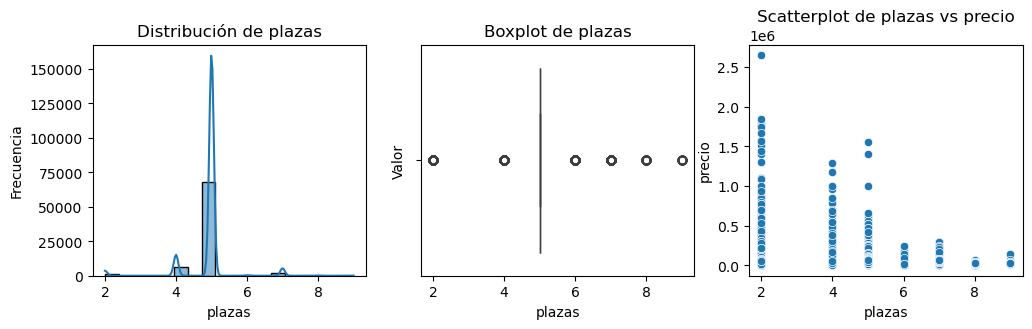

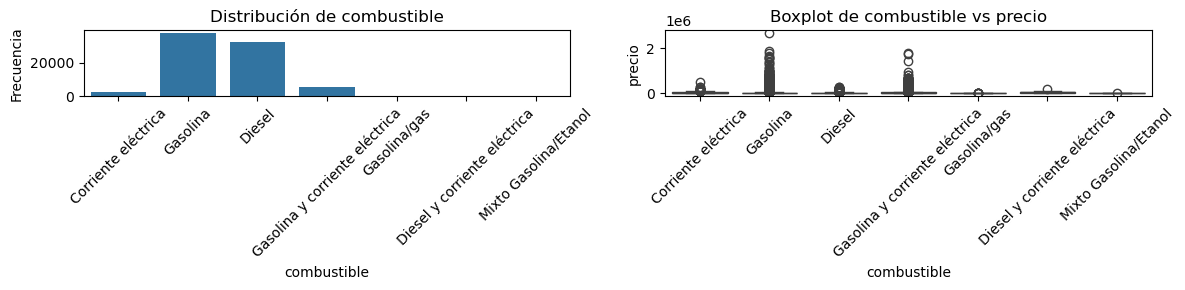

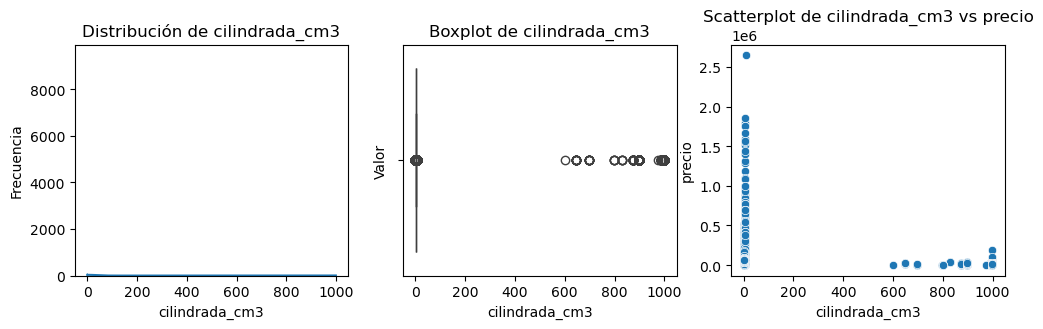

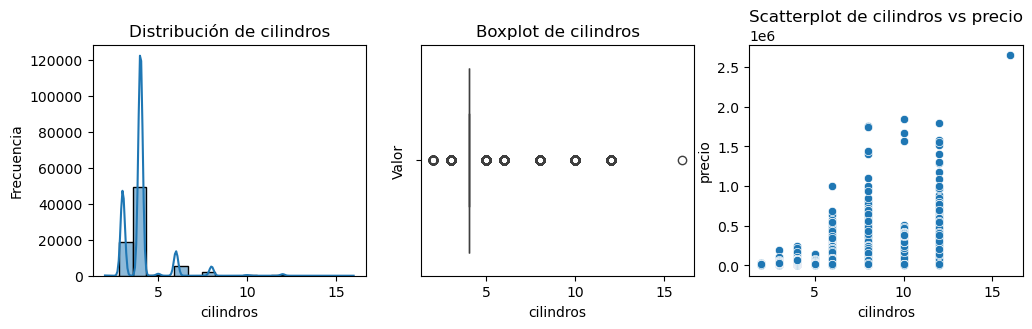

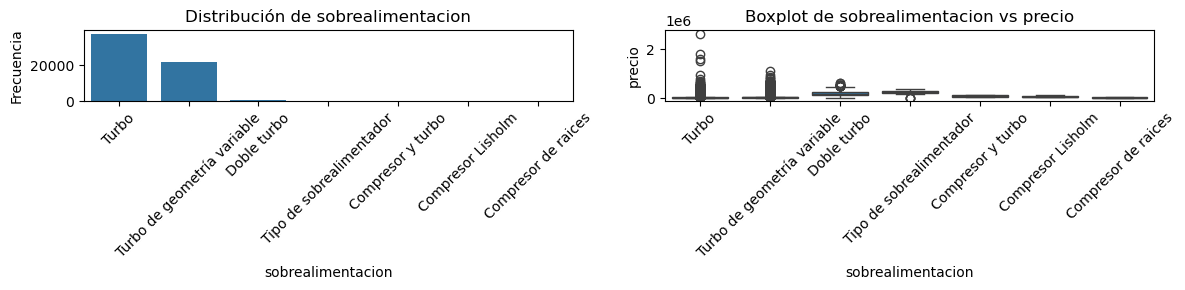

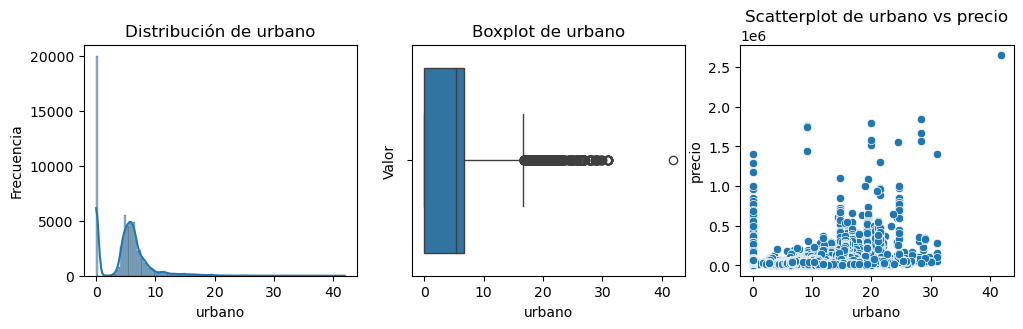

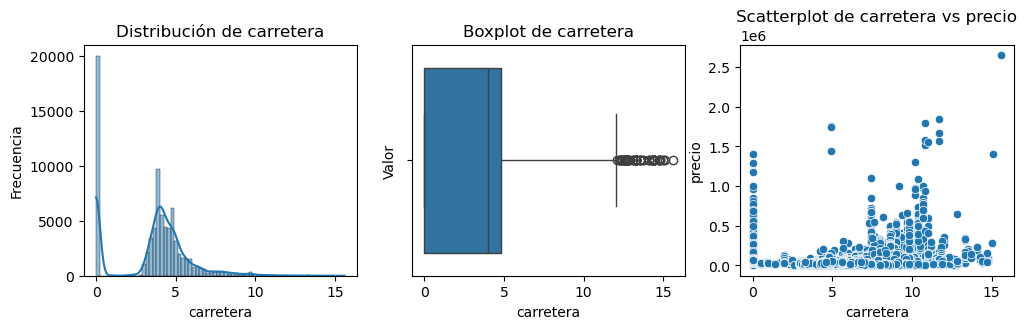

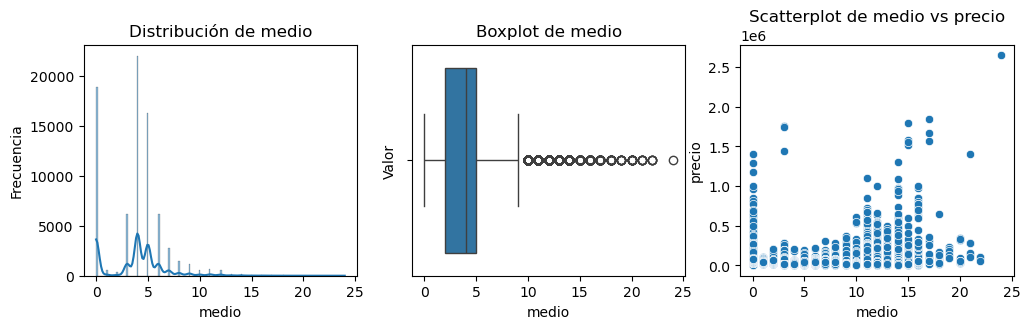

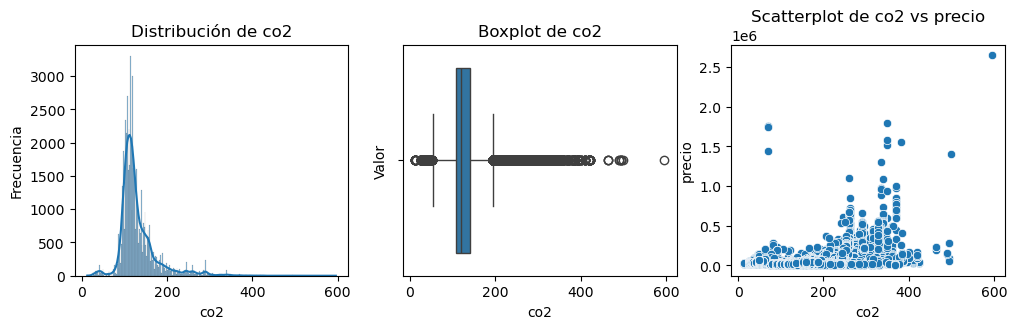

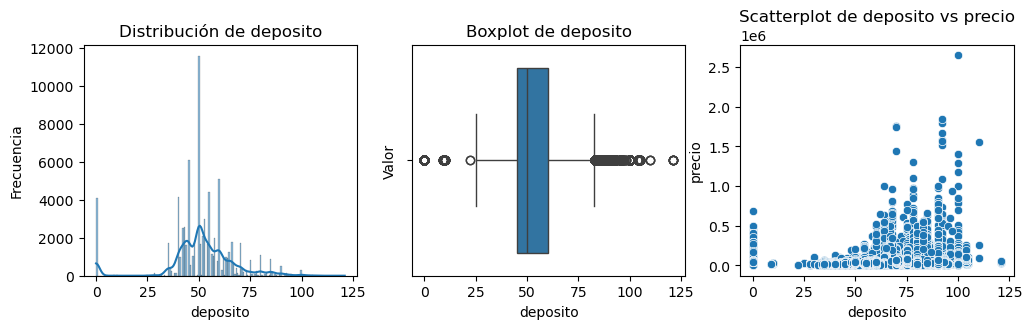

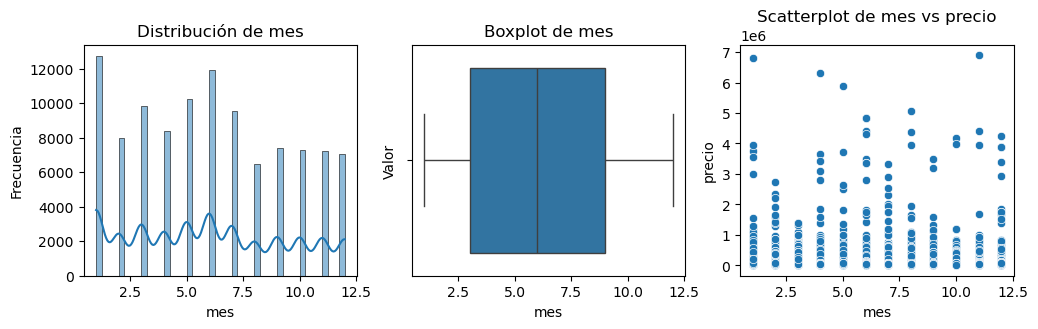

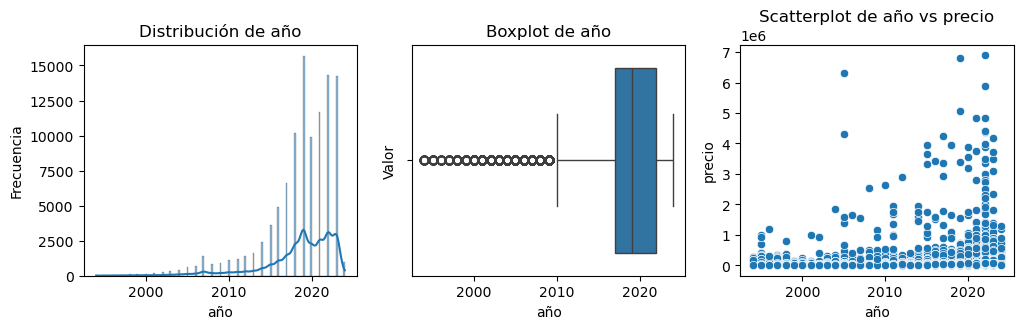

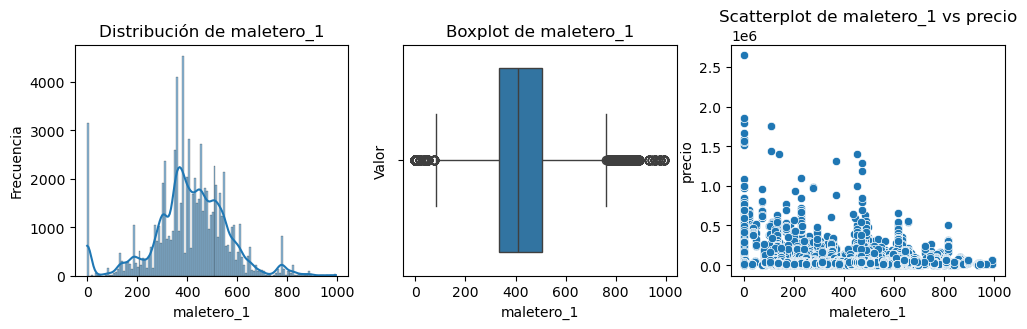

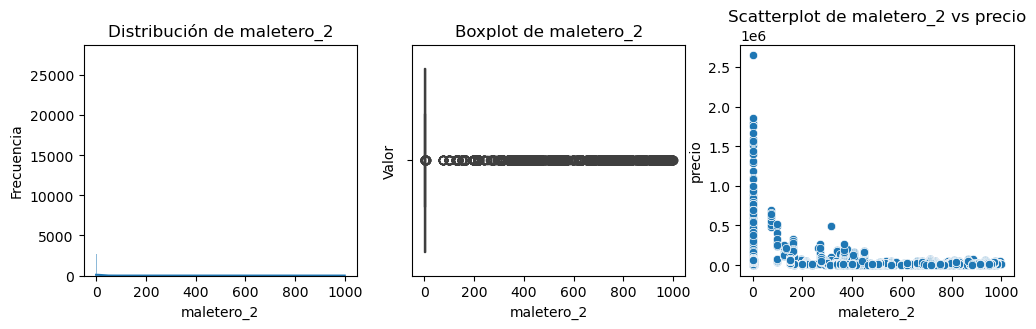

CPU times: total: 1min 18s
Wall time: 1min 45s


In [47]:
%%time

visualizacion_graficas(df, 'Fecha de matriculación', 'precio')
visualizacion_graficas(df, 'Kilómetros', 'precio')
visualizacion_graficas(df, 'Cambio', 'precio')
visualizacion_graficas(df, 'Potencia (cv)', 'precio')
visualizacion_graficas(df, 'Garantía', 'precio')
visualizacion_graficas(df, 'Color', 'precio')
visualizacion_graficas(df, 'Distintivo ambiental', 'precio')
visualizacion_graficas(df, 'largo', 'precio')
visualizacion_graficas(df, 'ancho', 'precio')
visualizacion_graficas(df, 'alto', 'precio')
visualizacion_graficas(df, 'batalla_mm', 'precio')
visualizacion_graficas(df, 'maletero_l' , 'precio')
visualizacion_graficas(df, 'peso_masa_kg', 'precio')
visualizacion_graficas(df, 'carroceria', 'precio')
visualizacion_graficas(df, 'puertas', 'precio')
visualizacion_graficas(df, 'plazas', 'precio')
visualizacion_graficas(df, 'combustible', 'precio')
visualizacion_graficas(df, 'cilindrada_cm3', 'precio')
visualizacion_graficas(df, 'cilindros', 'precio')
visualizacion_graficas(df, 'sobrealimentacion', 'precio')
visualizacion_graficas(df, 'urbano', 'precio')
visualizacion_graficas(df, 'carretera', 'precio')
visualizacion_graficas(df, 'medio', 'precio')
visualizacion_graficas(df, 'co2', 'precio')
visualizacion_graficas(df, 'deposito', 'precio')
visualizacion_graficas(df, 'mes', 'precio')
visualizacion_graficas(df, 'año', 'precio')
visualizacion_graficas(df, 'maletero_1', 'precio')
visualizacion_graficas(df, 'maletero_2', 'precio')

In [48]:
df

Fecha de matriculación  Kilómetros      Cambio  Potencia (cv)  \
0                     02/2023         3.0      Manual          179.0   
1                     06/2023         4.0      Manual          180.0   
2                     09/2023         1.0  Automático          154.0   
3                     10/2023         7.0  Automático          154.0   
4                     08/2023        10.0  Automático          154.0   
...                       ...         ...         ...            ...   
106366                12/2020        31.0  Automático          390.0   
106367                01/2021        39.0  Automático          390.0   
106368                03/2009         6.0  Automático          343.0   
106369                01/2007         8.0      Manual          367.0   
106370                10/2021         2.0  Automático           20.0   

        Garantía                                              Color  \
0           12.0                                              Negro   
1           24.0                                               Gris   
2           36.0  Azul Poisson (metalizado)\n                   ...   
3           36.0                                     PUNKN METALLIC   
4           36.0                                              Verde   
...          ...                                                ...   
106366      12.0                                         DEMIN BLUE   
106367      12.0     MAPLE BROWN\n                     / Metalizado   
106368       NaN                                             Blanco   
106369       NaN                                              Negro   
106370      24.0                                     PROTOTYPE GREY   

       Distintivo ambiental   largo   ancho    alto  ...  urbano carretera  \
0                         C     NaN     NaN     NaN  ...     NaN       NaN   
1                         C     NaN     NaN     NaN  ...     NaN       NaN   
2               0 EMISIONES  3673.0  1682.0  1518.0  ...     0.0       0.0   
3               0 EMISIONES  3673.0  1682.0  1518.0  ...     0.0       0.0   
4               0 EMISIONES  3673.0  1682.0  1518.0  ...     0.0       0.0   
...                     ...     ...     ...     ...  ...     ...       ...   
106366          0 EMISIONES  4950.0  2008.0  1776.0  ...     0.0       0.0   
106367          0 EMISIONES  4950.0  2008.0  1776.0  ...     0.0       0.0   
106368                    C     NaN     NaN     NaN  ...     NaN       NaN   
106369                    C     NaN     NaN     NaN  ...     NaN       NaN   
106370          0 EMISIONES     NaN     NaN     NaN  ...     NaN       NaN   

        medio   co2  deposito    precio mes   año  maletero_1 maletero_2  
0         NaN   NaN       NaN   29000.0   2  2023         NaN        NaN  
1         NaN   NaN       NaN   30500.0   6  2023         NaN        NaN  
2         0.0   NaN       0.0   43800.0   9  2023       185.0      550.0  
3         0.0   NaN       0.0   38990.0  10  2023       185.0      550.0  
4         0.0   NaN       0.0   35990.0   8  2023       185.0      550.0  
...       ...   ...       ...       ...  ..   ...         ...        ...  
106366    2.0  48.0      70.0   61500.0  12  2020       640.0        0.0  
106367    2.0  48.0      70.0   59890.0   1  2021       640.0        0.0  
106368    NaN   NaN       NaN  209900.0   3  2009         NaN        NaN  
106369    NaN   NaN       NaN  189900.0   1  2007         NaN        NaN  
106370    NaN   NaN       NaN   12490.0  10  2021         NaN        NaN  

[106080 rows x 30 columns]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106080 entries, 0 to 106370
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Fecha de matriculación  106080 non-null  object 
 1   Kilómetros              106080 non-null  float64
 2   Cambio                  106040 non-null  object 
 3   Potencia (cv)           103953 non-null  float64
 4   Garantía                90283 non-null   float64
 5   Color                   106080 non-null  object 
 6   Distintivo ambiental    97759 non-null   object 
 7   largo                   77979 non-null   float64
 8   ancho                   78220 non-null   float64
 9   alto                    77971 non-null   float64
 10  batalla_mm              78265 non-null   float64
 11  maletero_l              78265 non-null   object 
 12  peso_masa_kg            78265 non-null   float64
 13  carroceria              78265 non-null   object 
 14  puertas                 7

In [50]:
#Copias de DFs

In [51]:
df1 = df.copy()
df2 = df.copy()

In [52]:
# Seleccionar columnas categóricas (object)
df1 = df.select_dtypes(include=['object'])

# Seleccionar columnas continuas (float64 e int32)
df2 = df.select_dtypes(include=['float64', 'int32'])

In [53]:
df2.shape

(106080, 22)

In [54]:
df1.shape

(106080, 8)

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106080 entries, 0 to 106370
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Fecha de matriculación  106080 non-null  object
 1   Cambio                  106040 non-null  object
 2   Color                   106080 non-null  object
 3   Distintivo ambiental    97759 non-null   object
 4   maletero_l              78265 non-null   object
 5   carroceria              78265 non-null   object
 6   combustible             78265 non-null   object
 7   sobrealimentacion       60862 non-null   object
dtypes: object(8)
memory usage: 7.3+ MB


## Procesamiento (Parte 2)

In [56]:
%%time

def outliers_tukey_all_columns(df2, k=7):
    
    normal_data_df = df2.copy()
    outliers_df = pd.DataFrame(columns=df2.columns)

    
    for column_name in df2.select_dtypes(include=[np.number]).columns:
        
        array = df2[column_name]

        # Calculamos los cuartiles Q1 y Q3
        q1 = np.quantile(array, 0.25)
        q3 = np.quantile(array, 0.75)

        # Rango InterCuartil
        ric = q3 - q1

        # Calculamos los límites laterales
        lim_l = q1 - k * ric
        lim_r = q3 + k * ric

        # Filtramos los elementos del DataFrame, los que estén fuera de los límites laterales
        column_outliers = df2[(array < lim_l) | (array > lim_r)]
        outliers_df = pd.concat([outliers_df, column_outliers])

        # Filtramos los elementos del DataFrame, los que no pertenezcan a outliers
        normal_data_df = normal_data_df[(array >= lim_l) & (array <= lim_r)]

    # Retornamos ambos DataFrames, uno con los datos sin outliers, otro con los outliers
    return normal_data_df.drop_duplicates(), outliers_df.drop_duplicates()


normal_data_df, outliers_df = outliers_tukey_all_columns(df2)

print("Datos sin valores atípicos:")
print(normal_data_df)

print("\nValores atípicos:")
print(outliers_df)

print(f"\nCantidad de valores outliers eliminados: {len(outliers_df)}")
print(f"\nCantidad anterior: {len(normal_data_df)}")

Datos sin valores atípicos:
Empty DataFrame
Columns: [Kilómetros, Potencia (cv), Garantía, largo, ancho, alto, batalla_mm, peso_masa_kg, puertas, plazas, cilindrada_cm3, cilindros, urbano, carretera, medio, co2, deposito, precio, mes, año, maletero_1, maletero_2]
Index: []

[0 rows x 22 columns]

Valores atípicos:
        Kilómetros  Potencia (cv)  Garantía   largo   ancho    alto  \
177          980.0          725.0      12.0  4715.0  1970.0  1295.0   
180          920.0          725.0       NaN  4715.0  1970.0  1295.0   
198          700.0          550.0      24.0  5039.0  1998.0  1680.0   
199          860.0          550.0      24.0  5039.0  1998.0  1680.0   
218          690.0          700.0       NaN     NaN     NaN     NaN   
...            ...            ...       ...     ...     ...     ...   
96691         10.0          303.0      12.0     NaN     NaN     NaN   
97484         10.0          235.0       6.0  4620.0  1745.0  1300.0   
97485        160.0          235.0       NaN  

<timed exec>:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
<timed exec>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<timed exec>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<timed exec>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<timed exec>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<timed exec>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<timed exec>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<timed exec>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<timed exec>:27: UserWarning: Boolean 

In [57]:
df2.copy

<bound method NDFrame.copy of         Kilómetros  Potencia (cv)  Garantía   largo   ancho    alto  \
0              3.0          179.0      12.0     NaN     NaN     NaN   
1              4.0          180.0      24.0     NaN     NaN     NaN   
2              1.0          154.0      36.0  3673.0  1682.0  1518.0   
3              7.0          154.0      36.0  3673.0  1682.0  1518.0   
4             10.0          154.0      36.0  3673.0  1682.0  1518.0   
...            ...            ...       ...     ...     ...     ...   
106366        31.0          390.0      12.0  4950.0  2008.0  1776.0   
106367        39.0          390.0      12.0  4950.0  2008.0  1776.0   
106368         6.0          343.0       NaN     NaN     NaN     NaN   
106369         8.0          367.0       NaN     NaN     NaN     NaN   
106370         2.0           20.0      24.0     NaN     NaN     NaN   

        batalla_mm  peso_masa_kg  puertas  plazas  ...  urbano  carretera  \
0              NaN           NaN      Na

In [58]:
df2_copy_sin_out = df2.copy()

In [59]:
df2_copy_sin_out

Kilómetros  Potencia (cv)  Garantía   largo   ancho    alto  \
0              3.0          179.0      12.0     NaN     NaN     NaN   
1              4.0          180.0      24.0     NaN     NaN     NaN   
2              1.0          154.0      36.0  3673.0  1682.0  1518.0   
3              7.0          154.0      36.0  3673.0  1682.0  1518.0   
4             10.0          154.0      36.0  3673.0  1682.0  1518.0   
...            ...            ...       ...     ...     ...     ...   
106366        31.0          390.0      12.0  4950.0  2008.0  1776.0   
106367        39.0          390.0      12.0  4950.0  2008.0  1776.0   
106368         6.0          343.0       NaN     NaN     NaN     NaN   
106369         8.0          367.0       NaN     NaN     NaN     NaN   
106370         2.0           20.0      24.0     NaN     NaN     NaN   

        batalla_mm  peso_masa_kg  puertas  plazas  ...  urbano  carretera  \
0              NaN           NaN      NaN     NaN  ...     NaN        NaN   
1              NaN           NaN      NaN     NaN  ...     NaN        NaN   
2           2322.0        1410.0      3.0     4.0  ...     0.0        0.0   
3           2322.0        1410.0      3.0     4.0  ...     0.0        0.0   
4           2322.0        1410.0      3.0     4.0  ...     0.0        0.0   
...            ...           ...      ...     ...  ...     ...        ...   
106366      2984.0        2980.0      5.0     7.0  ...     0.0        0.0   
106367      2984.0        3050.0      5.0     5.0  ...     0.0        0.0   
106368         NaN           NaN      NaN     NaN  ...     NaN        NaN   
106369         NaN           NaN      NaN     NaN  ...     NaN        NaN   
106370         NaN           NaN      NaN     NaN  ...     NaN        NaN   

        medio   co2  deposito    precio  mes   año  maletero_1  maletero_2  
0         NaN   NaN       NaN   29000.0    2  2023         NaN         NaN  
1         NaN   NaN       NaN   30500.0    6  2023         NaN         NaN  
2         0.0   NaN       0.0   43800.0    9  2023       185.0       550.0  
3         0.0   NaN       0.0   38990.0   10  2023       185.0       550.0  
4         0.0   NaN       0.0   35990.0    8  2023       185.0       550.0  
...       ...   ...       ...       ...  ...   ...         ...         ...  
106366    2.0  48.0      70.0   61500.0   12  2020       640.0         0.0  
106367    2.0  48.0      70.0   59890.0    1  2021       640.0         0.0  
106368    NaN   NaN       NaN  209900.0    3  2009         NaN         NaN  
106369    NaN   NaN       NaN  189900.0    1  2007         NaN         NaN  
106370    NaN   NaN       NaN   12490.0   10  2021         NaN         NaN  

[106080 rows x 22 columns]

In [60]:
df2_copy_sin_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106080 entries, 0 to 106370
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Kilómetros      106080 non-null  float64
 1   Potencia (cv)   103953 non-null  float64
 2   Garantía        90283 non-null   float64
 3   largo           77979 non-null   float64
 4   ancho           78220 non-null   float64
 5   alto            77971 non-null   float64
 6   batalla_mm      78265 non-null   float64
 7   peso_masa_kg    78265 non-null   float64
 8   puertas         78265 non-null   float64
 9   plazas          78265 non-null   float64
 10  cilindrada_cm3  78265 non-null   float64
 11  cilindros       75841 non-null   float64
 12  urbano          78265 non-null   float64
 13  carretera       78265 non-null   float64
 14  medio           78265 non-null   float64
 15  co2             59078 non-null   float64
 16  deposito        78265 non-null   float64
 17  precio         

In [61]:
df1 = df1.drop(['Fecha de matriculación', 'Color', 'maletero_l'], axis=1)
df1

Cambio Distintivo ambiental    carroceria  \
0           Manual                    C           NaN   
1           Manual                    C           NaN   
2       Automático          0 EMISIONES       Berlina   
3       Automático          0 EMISIONES       Berlina   
4       Automático          0 EMISIONES       Berlina   
...            ...                  ...           ...   
106366  Automático          0 EMISIONES  Todo Terreno   
106367  Automático          0 EMISIONES  Todo Terreno   
106368  Automático                    C           NaN   
106369      Manual                    C           NaN   
106370  Automático          0 EMISIONES           NaN   

                           combustible sobrealimentacion  
0                                  NaN               NaN  
1                                  NaN               NaN  
2                  Corriente eléctrica             Turbo  
3                  Corriente eléctrica             Turbo  
4                  Corriente eléctrica             Turbo  
...                                ...               ...  
106366  Gasolina y corriente eléctrica             Turbo  
106367  Gasolina y corriente eléctrica             Turbo  
106368                             NaN               NaN  
106369                             NaN               NaN  
106370                             NaN               NaN  

[106080 rows x 5 columns]

### Usar LabelEncoder() de la librería scikit-learn para transformar las columnas que tengan 2 categorías

In [63]:
#Verificar columnas con 2 Categorias
for col in df1.select_dtypes(include=[object]):
    if df1[col].nunique() == 2:
        print(f"Columna '{col}' tiene 2 categorías: {df1[col].unique()}")

Columna 'Cambio' tiene 2 categorías: ['Manual' 'Automático' nan]


In [64]:
le = LabelEncoder()
if df1['Cambio'].nunique() == 2:
    df1['Cambio'] = le.fit_transform(df1['Cambio'])
df1

Cambio Distintivo ambiental    carroceria  \
0            1                    C           NaN   
1            1                    C           NaN   
2            0          0 EMISIONES       Berlina   
3            0          0 EMISIONES       Berlina   
4            0          0 EMISIONES       Berlina   
...        ...                  ...           ...   
106366       0          0 EMISIONES  Todo Terreno   
106367       0          0 EMISIONES  Todo Terreno   
106368       0                    C           NaN   
106369       1                    C           NaN   
106370       0          0 EMISIONES           NaN   

                           combustible sobrealimentacion  
0                                  NaN               NaN  
1                                  NaN               NaN  
2                  Corriente eléctrica             Turbo  
3                  Corriente eléctrica             Turbo  
4                  Corriente eléctrica             Turbo  
...                                ...               ...  
106366  Gasolina y corriente eléctrica             Turbo  
106367  Gasolina y corriente eléctrica             Turbo  
106368                             NaN               NaN  
106369                             NaN               NaN  
106370                             NaN               NaN  

[106080 rows x 5 columns]

### Usar OneHotEncoder() de la librería scikit-learn para transformar las columnas que tengan más de 2 categorías. 

In [66]:
%%time

dist_amb_coder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
dist_amb_coder.set_output(transform='pandas')
colum_dist_amb = dist_amb_coder.fit_transform(df1[['Distintivo ambiental']])
df1 = pd.concat(objs=[df1, colum_dist_amb], axis=1)

carroceria_coder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
carroceria_coder.set_output(transform='pandas')
colum_carroceria = dist_amb_coder.fit_transform(df1[['carroceria']])
df1 = pd.concat(objs=[df1, colum_carroceria], axis=1)

combustible_coder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
combustible_coder.set_output(transform='pandas')
colum_combustible = dist_amb_coder.fit_transform(df1[['combustible']])
df1 = pd.concat(objs=[df1, colum_combustible], axis=1)

sobre_alimentacion_coder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
sobre_alimentacion_coder.set_output(transform='pandas')
colum_sobre_alimentacion = dist_amb_coder.fit_transform(df1[['sobrealimentacion']])
df1 = pd.concat(objs=[df1, colum_sobre_alimentacion], axis=1)

df1

CPU times: total: 15.6 ms
Wall time: 228 ms


Cambio Distintivo ambiental    carroceria  \
0            1                    C           NaN   
1            1                    C           NaN   
2            0          0 EMISIONES       Berlina   
3            0          0 EMISIONES       Berlina   
4            0          0 EMISIONES       Berlina   
...        ...                  ...           ...   
106366       0          0 EMISIONES  Todo Terreno   
106367       0          0 EMISIONES  Todo Terreno   
106368       0                    C           NaN   
106369       1                    C           NaN   
106370       0          0 EMISIONES           NaN   

                           combustible sobrealimentacion  \
0                                  NaN               NaN   
1                                  NaN               NaN   
2                  Corriente eléctrica             Turbo   
3                  Corriente eléctrica             Turbo   
4                  Corriente eléctrica             Turbo   
...                                ...               ...   
106366  Gasolina y corriente eléctrica             Turbo   
106367  Gasolina y corriente eléctrica             Turbo   
106368                             NaN               NaN   
106369                             NaN               NaN   
106370                             NaN               NaN   

        Distintivo ambiental_0 EMISIONES  Distintivo ambiental_B  \
0                                    0.0                     0.0   
1                                    0.0                     0.0   
2                                    1.0                     0.0   
3                                    1.0                     0.0   
4                                    1.0                     0.0   
...                                  ...                     ...   
106366                               1.0                     0.0   
106367                               1.0                     0.0   
106368                               0.0                     0.0   
106369                               0.0                     0.0   
106370                               1.0                     0.0   

        Distintivo ambiental_C  Distintivo ambiental_ECO  \
0                          1.0                       0.0   
1                          1.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
106366                     0.0                       0.0   
106367                     0.0                       0.0   
106368                     1.0                       0.0   
106369                     1.0                       0.0   
106370                     0.0                       0.0   

        Distintivo ambiental_nan  ...  combustible_nan  \
0                            0.0  ...              1.0   
1                            0.0  ...              1.0   
2                            0.0  ...              0.0   
3                            0.0  ...              0.0   
4                            0.0  ...              0.0   
...                          ...  ...              ...   
106366                       0.0  ...              0.0   
106367                       0.0  ...              0.0   
106368                       0.0  ...              1.0   
106369                       0.0  ...              1.0   
106370                       0.0  ...              1.0   

        sobrealimentacion_Compresor Lisholm  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
106366                                  0.0   
106367                                 

In [67]:
df1.shape

(106080, 39)

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106080 entries, 0 to 106370
Data columns (total 39 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Cambio                                         106080 non-null  int32  
 1   Distintivo ambiental                           97759 non-null   object 
 2   carroceria                                     78265 non-null   object 
 3   combustible                                    78265 non-null   object 
 4   sobrealimentacion                              60862 non-null   object 
 5   Distintivo ambiental_0 EMISIONES               106080 non-null  float64
 6   Distintivo ambiental_B                         106080 non-null  float64
 7   Distintivo ambiental_C                         106080 non-null  float64
 8   Distintivo ambiental_ECO                       106080 non-null  float64
 9   Distintivo ambiental_nan                  

In [69]:
df__semi_procesado = pd.concat([df1,df2_copy_sin_out],axis = 1)
df__semi_procesado

Cambio Distintivo ambiental    carroceria  \
0            1                    C           NaN   
1            1                    C           NaN   
2            0          0 EMISIONES       Berlina   
3            0          0 EMISIONES       Berlina   
4            0          0 EMISIONES       Berlina   
...        ...                  ...           ...   
106366       0          0 EMISIONES  Todo Terreno   
106367       0          0 EMISIONES  Todo Terreno   
106368       0                    C           NaN   
106369       1                    C           NaN   
106370       0          0 EMISIONES           NaN   

                           combustible sobrealimentacion  \
0                                  NaN               NaN   
1                                  NaN               NaN   
2                  Corriente eléctrica             Turbo   
3                  Corriente eléctrica             Turbo   
4                  Corriente eléctrica             Turbo   
...                                ...               ...   
106366  Gasolina y corriente eléctrica             Turbo   
106367  Gasolina y corriente eléctrica             Turbo   
106368                             NaN               NaN   
106369                             NaN               NaN   
106370                             NaN               NaN   

        Distintivo ambiental_0 EMISIONES  Distintivo ambiental_B  \
0                                    0.0                     0.0   
1                                    0.0                     0.0   
2                                    1.0                     0.0   
3                                    1.0                     0.0   
4                                    1.0                     0.0   
...                                  ...                     ...   
106366                               1.0                     0.0   
106367                               1.0                     0.0   
106368                               0.0                     0.0   
106369                               0.0                     0.0   
106370                               1.0                     0.0   

        Distintivo ambiental_C  Distintivo ambiental_ECO  \
0                          1.0                       0.0   
1                          1.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
106366                     0.0                       0.0   
106367                     0.0                       0.0   
106368                     1.0                       0.0   
106369                     1.0                       0.0   
106370                     0.0                       0.0   

        Distintivo ambiental_nan  ...  urbano  carretera  medio   co2  \
0                            0.0  ...     NaN        NaN    NaN   NaN   
1                            0.0  ...     NaN        NaN    NaN   NaN   
2                            0.0  ...     0.0        0.0    0.0   NaN   
3                            0.0  ...     0.0        0.0    0.0   NaN   
4                            0.0  ...     0.0        0.0    0.0   NaN   
...                          ...  ...     ...        ...    ...   ...   
106366                       0.0  ...     0.0        0.0    2.0  48.0   
106367                       0.0  ...     0.0        0.0    2.0  48.0   
106368                       0.0  ...     NaN        NaN    NaN   NaN   
106369                       0.0  ...     NaN        NaN    NaN   NaN   
106370                       0.0  ...     NaN        NaN    NaN   NaN   

        deposito    precio  mes   año  maletero_1  maletero_2  
0            NaN   29000.0    2  2023         NaN         NaN  
1            NaN   30500.0    6  2023         NaN         NaN  
2            0.0   43800.0    9  2023      

In [70]:
df1_1 = df__semi_procesado.copy()
df1_2 = df__semi_procesado.copy()

In [71]:
df1_1cat = df1_1.select_dtypes(include=['object'])
df1_1cat

Distintivo ambiental    carroceria                     combustible  \
0                         C           NaN                             NaN   
1                         C           NaN                             NaN   
2               0 EMISIONES       Berlina             Corriente eléctrica   
3               0 EMISIONES       Berlina             Corriente eléctrica   
4               0 EMISIONES       Berlina             Corriente eléctrica   
...                     ...           ...                             ...   
106366          0 EMISIONES  Todo Terreno  Gasolina y corriente eléctrica   
106367          0 EMISIONES  Todo Terreno  Gasolina y corriente eléctrica   
106368                    C           NaN                             NaN   
106369                    C           NaN                             NaN   
106370          0 EMISIONES           NaN                             NaN   

       sobrealimentacion  
0                    NaN  
1                    NaN  
2                  Turbo  
3                  Turbo  
4                  Turbo  
...                  ...  
106366             Turbo  
106367             Turbo  
106368               NaN  
106369               NaN  
106370               NaN  

[106080 rows x 4 columns]

In [72]:
df1_2cont = df1_2.select_dtypes(include=['float64', 'int32'])
df1_2cont 

Cambio  Distintivo ambiental_0 EMISIONES  Distintivo ambiental_B  \
0            1                               0.0                     0.0   
1            1                               0.0                     0.0   
2            0                               1.0                     0.0   
3            0                               1.0                     0.0   
4            0                               1.0                     0.0   
...        ...                               ...                     ...   
106366       0                               1.0                     0.0   
106367       0                               1.0                     0.0   
106368       0                               0.0                     0.0   
106369       1                               0.0                     0.0   
106370       0                               1.0                     0.0   

        Distintivo ambiental_C  Distintivo ambiental_ECO  \
0                          1.0                       0.0   
1                          1.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
106366                     0.0                       0.0   
106367                     0.0                       0.0   
106368                     1.0                       0.0   
106369                     1.0                       0.0   
106370                     0.0                       0.0   

        Distintivo ambiental_nan  carroceria_Berlina  carroceria_Combi  \
0                            0.0                 0.0               0.0   
1                            0.0                 0.0               0.0   
2                            0.0                 1.0               0.0   
3                            0.0                 1.0               0.0   
4                            0.0                 1.0               0.0   
...                          ...                 ...               ...   
106366                       0.0                 0.0               0.0   
106367                       0.0                 0.0               0.0   
106368                       0.0                 0.0               0.0   
106369                       0.0                 0.0               0.0   
106370                       0.0                 0.0               0.0   

        carroceria_Convertible  carroceria_Coupe  ...  urbano  carretera  \
0                          0.0               0.0  ...     NaN        NaN   
1                          0.0               0.0  ...     NaN        NaN   
2                          0.0               0.0  ...     0.0        0.0   
3                          0.0               0.0  ...     0.0        0.0   
4                          0.0               0.0  ...     0.0        0.0   
...                        ...               ...  ...     ...        ...   
106366                     0.0               0.0  ...     0.0        0.0   
106367                     0.0               0.0  ...     0.0        0.0   
106368                     0.0               0.0  ...     NaN        NaN   
106369                     0.0               0.0  ...     NaN        NaN   
106370                     0.0               0.0  ...     NaN        NaN   

        medio   co2  deposito    precio  mes   año  maletero_1  maletero_2  
0         NaN   NaN       NaN   29000.0    2  2023         NaN         NaN  
1         NaN   NaN       NaN   30500.0    6  2023         NaN         NaN  
2         0.0   NaN       0.0   43800.0    9  2023       185.0       550.0  
3         0.0   NaN       0.0   38990.0   10  2023       185.0       550.0  
4         0.0   NaN       0.0   35990.0    8  2023       185.0       550.0  
...       ...   ...       ...       ...  ...   ...         ...         ...  
106366    2.0  48.0      70.0   6

### Usa KNNImputer() de la librería scikit-learn para llenar los NaN's de cada columna.

In [74]:
%%time

imputer = KNNImputer(n_neighbors = 3)

imputer.set_output(transform = 'pandas')

df1_2cont = pd.DataFrame(imputer.fit_transform(df1_2cont),
                                           columns = df1_2cont.columns)


CPU times: total: 36min 25s
Wall time: 48min 24s


## Genera un gráfico de correlación. ¿Que columnas están más correladas con la columna precio?

In [76]:
df1_2cont

Cambio  Distintivo ambiental_0 EMISIONES  Distintivo ambiental_B  \
0          1.0                               0.0                     0.0   
1          1.0                               0.0                     0.0   
2          0.0                               1.0                     0.0   
3          0.0                               1.0                     0.0   
4          0.0                               1.0                     0.0   
...        ...                               ...                     ...   
106366     0.0                               1.0                     0.0   
106367     0.0                               1.0                     0.0   
106368     0.0                               0.0                     0.0   
106369     1.0                               0.0                     0.0   
106370     0.0                               1.0                     0.0   

        Distintivo ambiental_C  Distintivo ambiental_ECO  \
0                          1.0                       0.0   
1                          1.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
106366                     0.0                       0.0   
106367                     0.0                       0.0   
106368                     1.0                       0.0   
106369                     1.0                       0.0   
106370                     0.0                       0.0   

        Distintivo ambiental_nan  carroceria_Berlina  carroceria_Combi  \
0                            0.0                 0.0               0.0   
1                            0.0                 0.0               0.0   
2                            0.0                 1.0               0.0   
3                            0.0                 1.0               0.0   
4                            0.0                 1.0               0.0   
...                          ...                 ...               ...   
106366                       0.0                 0.0               0.0   
106367                       0.0                 0.0               0.0   
106368                       0.0                 0.0               0.0   
106369                       0.0                 0.0               0.0   
106370                       0.0                 0.0               0.0   

        carroceria_Convertible  carroceria_Coupe  ...    urbano  carretera  \
0                          0.0               0.0  ...  4.666667   3.133333   
1                          0.0               0.0  ...  2.166667   1.733333   
2                          0.0               0.0  ...  0.000000   0.000000   
3                          0.0               0.0  ...  0.000000   0.000000   
4                          0.0               0.0  ...  0.000000   0.000000   
...                        ...               ...  ...       ...        ...   
106366                     0.0               0.0  ...  0.000000   0.000000   
106367                     0.0               0.0  ...  0.000000   0.000000   
106368                     0.0               0.0  ...  4.433333   2.666667   
106369                     0.0               0.0  ...  4.433333   2.666667   
106370                     0.0               0.0  ...  0.000000   0.000000   

           medio         co2   deposito    precio   mes     año  maletero_1  \
0       3.333333   76.666667  31.333333   29000.0   2.0  2023.0  313.666667   
1       1.666667  145.666667  50.000000   30500.0   6.0  2023.0  501.333333   
2       0.000000  197.333333   0.000000   43800.0   9.0  2023.0  185.000000   
3       0.000000  160.000000   0.000000   38990.0  10.0  2023.0  185.000000   
4       0.000000  148.666667   0.000000   35990.0   8.0  2023.0  185.000000   
...          ...         ...        ...       ...   ...     ...         ..

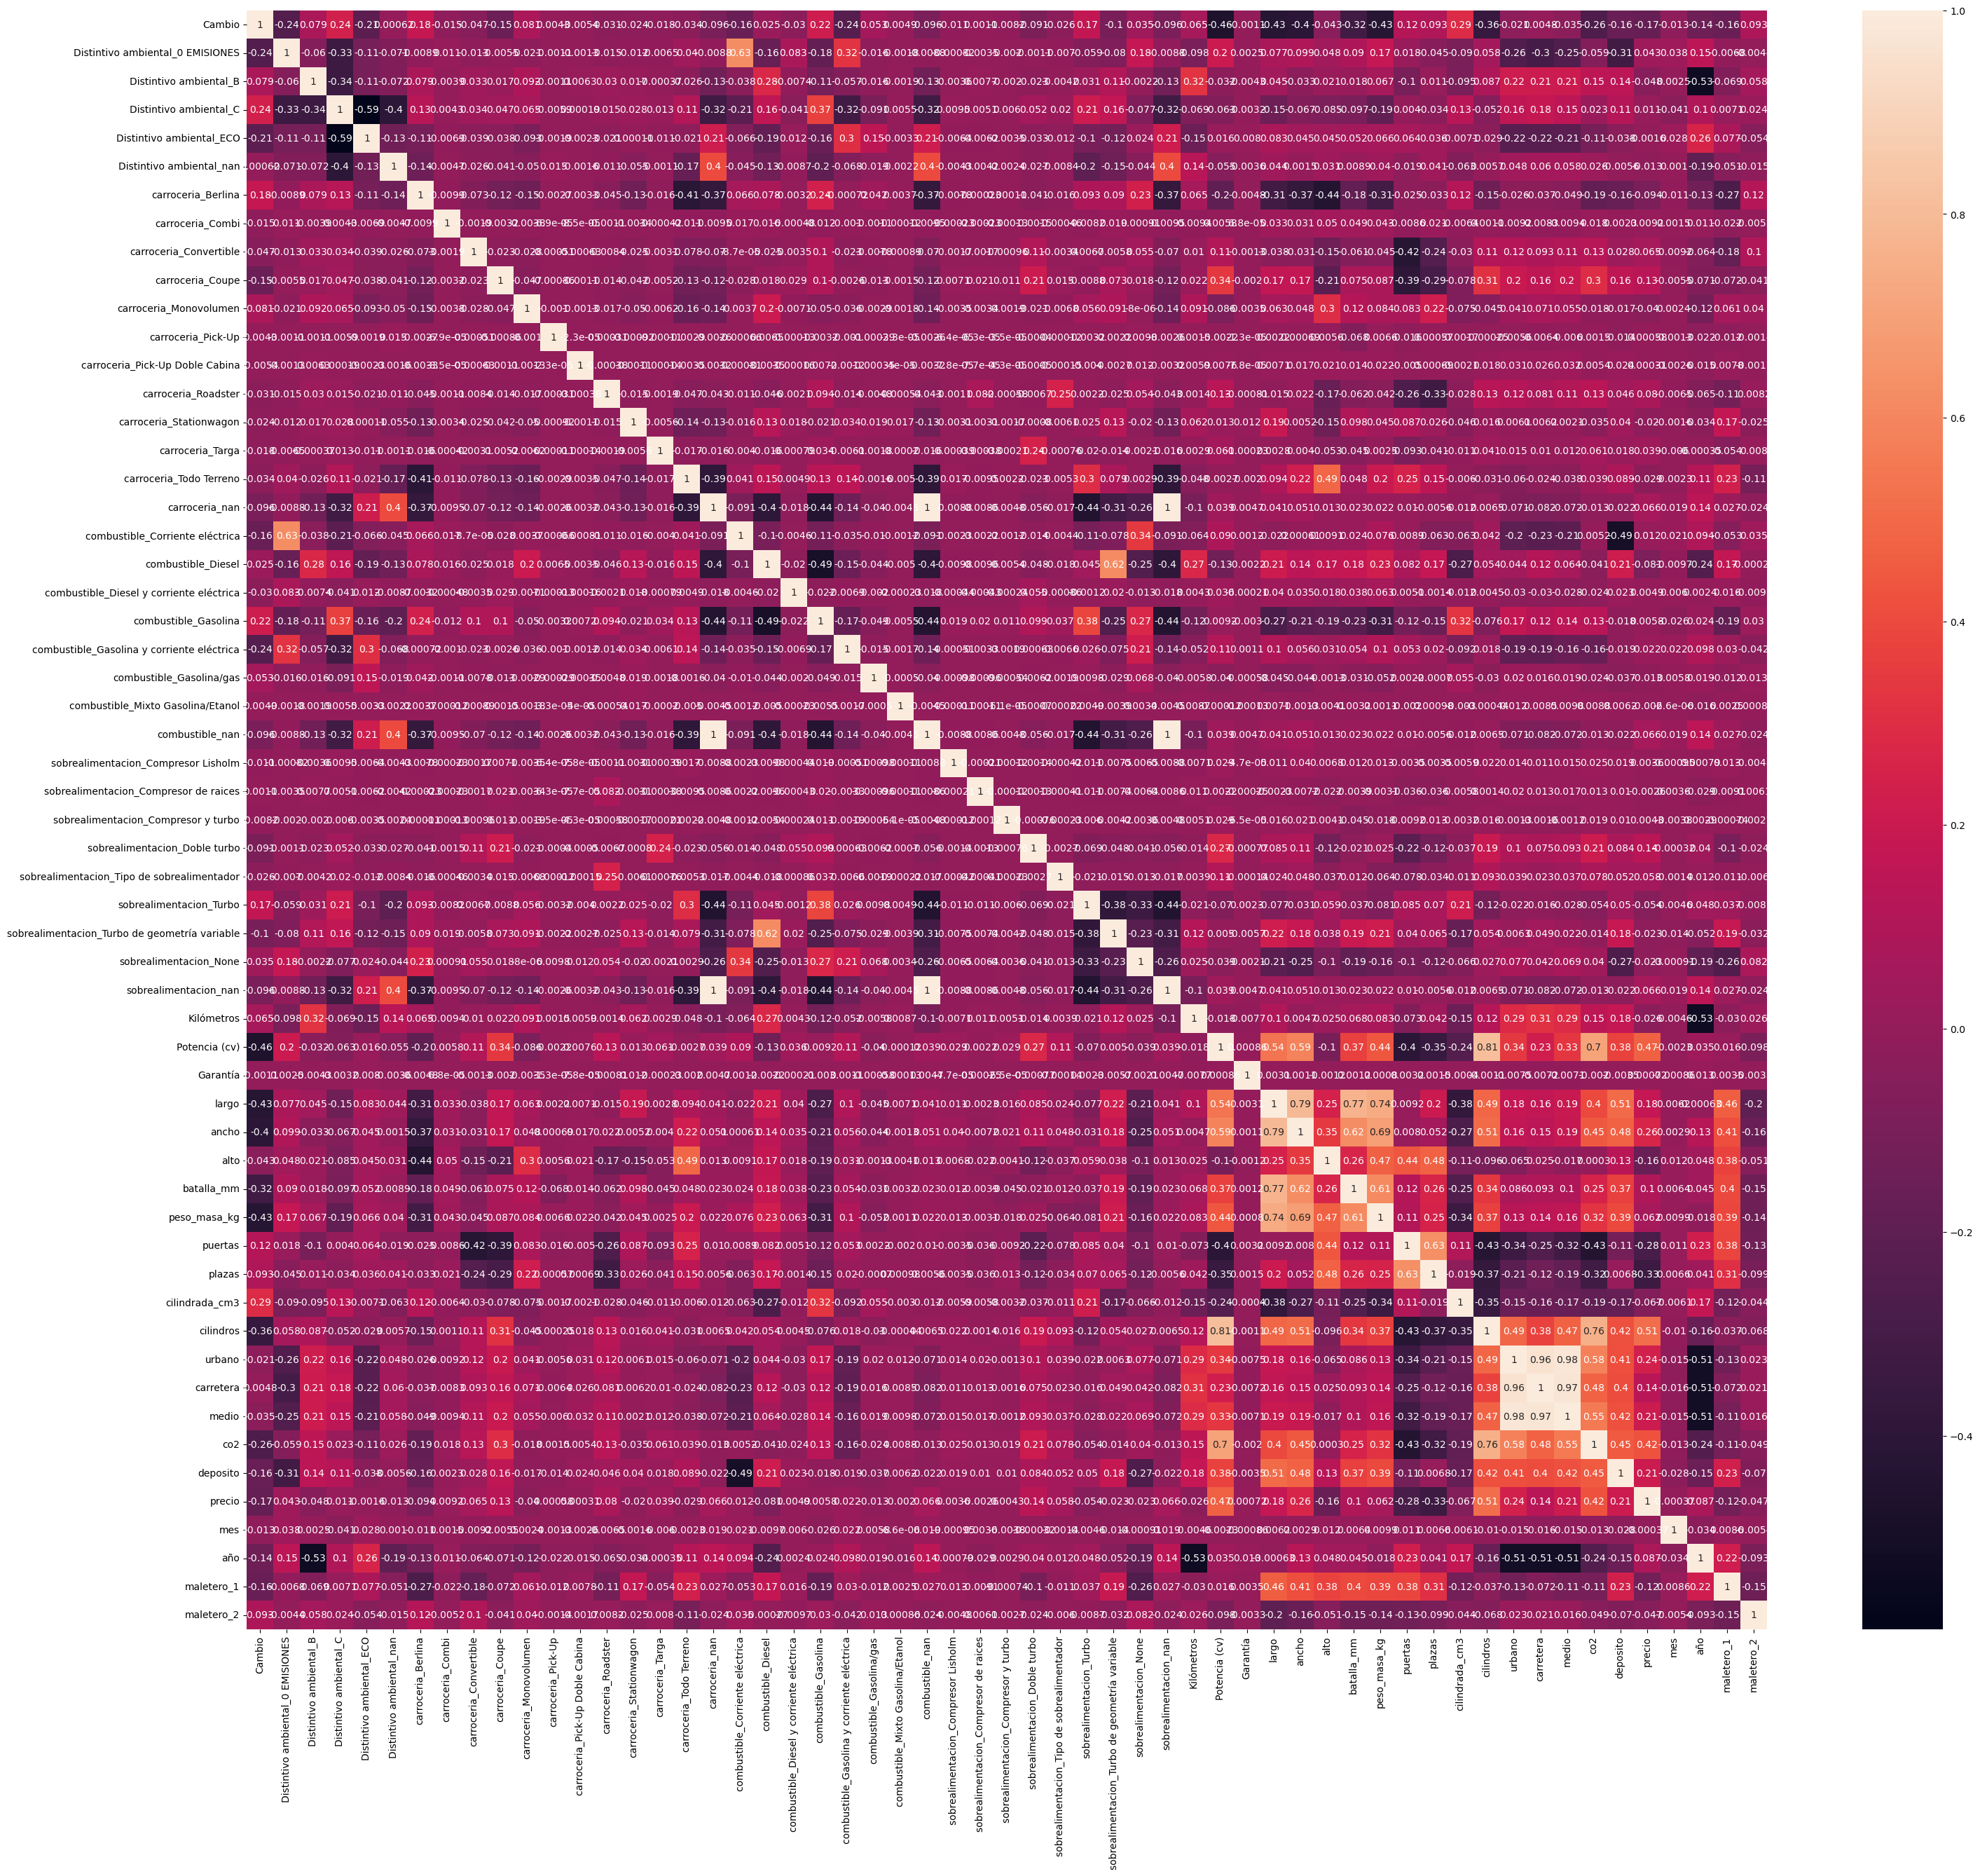

In [77]:
plt.figure(figsize = (35, 30))

sns.heatmap(df1_2cont.corr(), annot = True)
plt.show()

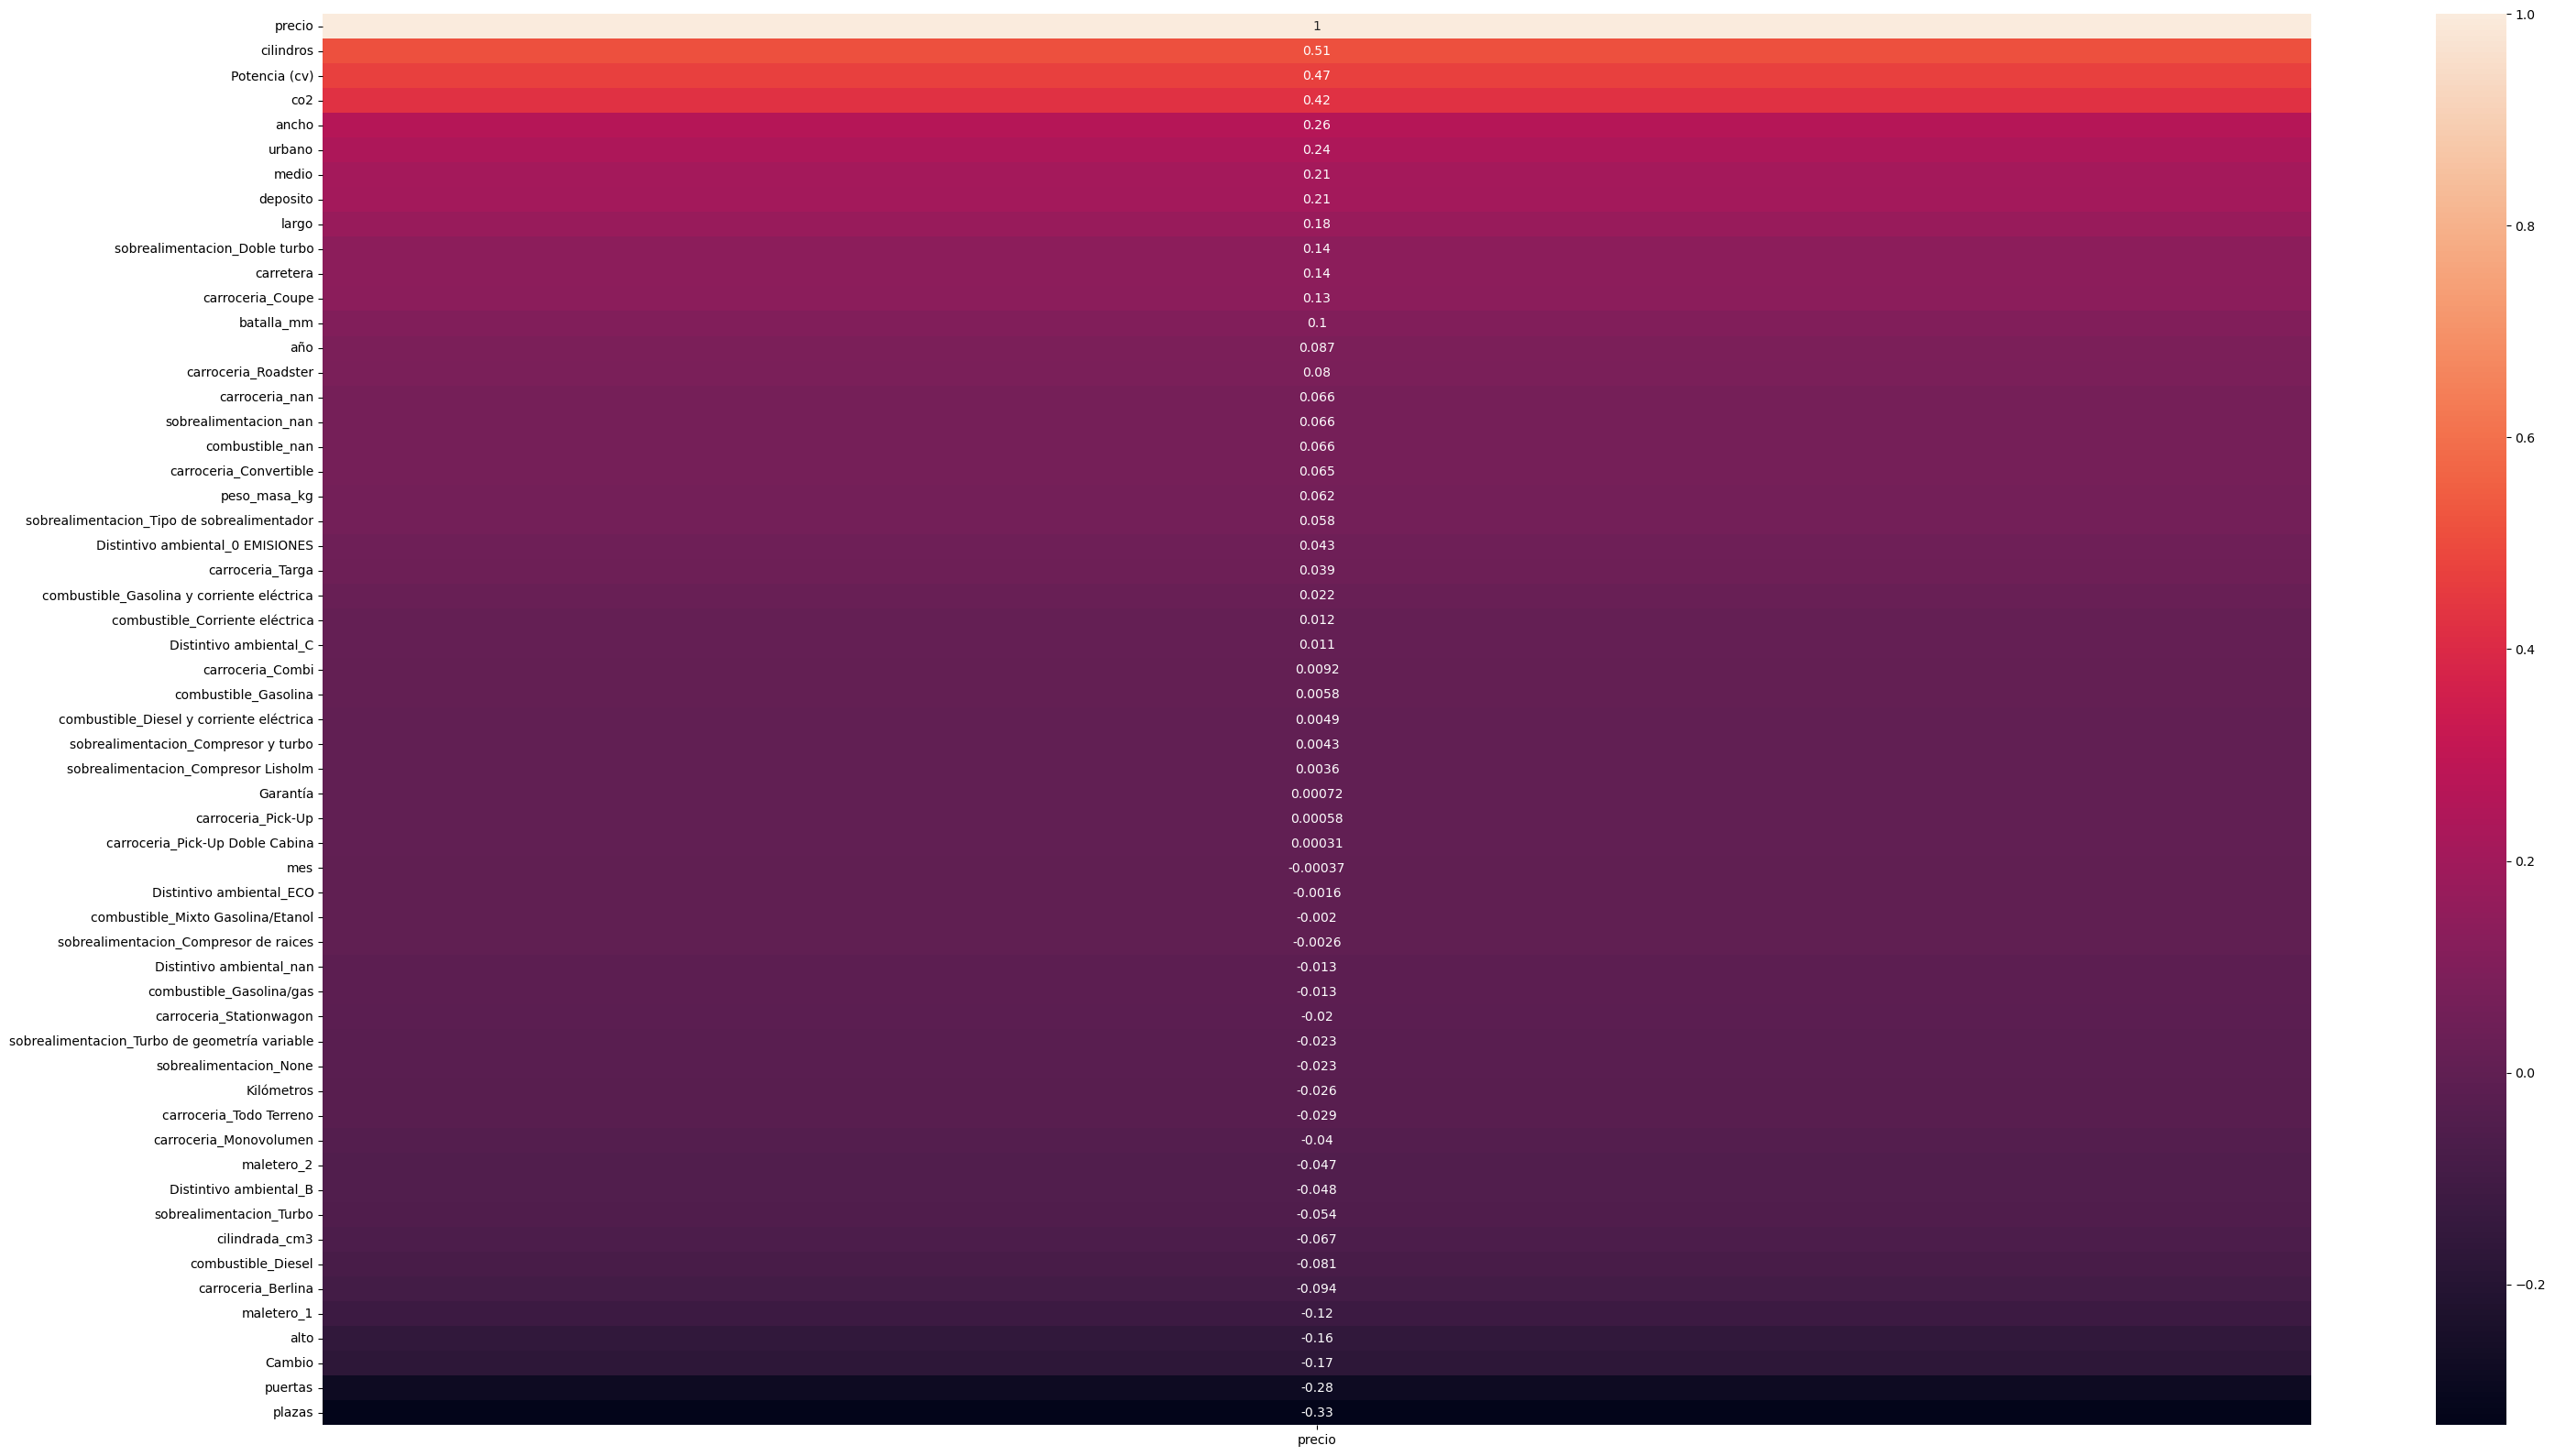

In [183]:
plt.figure(figsize = (35, 20))
corr_matrix = df1_2cont.corr()
sorted_corr = corr_matrix[['precio']].sort_values(by='precio', ascending=False)
sns.heatmap(sorted_corr, annot = True)
plt.show()

In [79]:
#Concatenar los dos dataframes, datos categoricos y datos continuos
df_autocasion_procesado = pd.concat([df1_1cat,df1_2cont],axis = 1)
df_autocasion_procesado

Distintivo ambiental    carroceria                     combustible  \
0                         C           NaN                             NaN   
1                         C           NaN                             NaN   
2               0 EMISIONES       Berlina             Corriente eléctrica   
3               0 EMISIONES       Berlina             Corriente eléctrica   
4               0 EMISIONES       Berlina             Corriente eléctrica   
...                     ...           ...                             ...   
106366          0 EMISIONES  Todo Terreno  Gasolina y corriente eléctrica   
106367          0 EMISIONES  Todo Terreno  Gasolina y corriente eléctrica   
106368                    C           NaN                             NaN   
106369                    C           NaN                             NaN   
106370          0 EMISIONES           NaN                             NaN   

       sobrealimentacion  Cambio  Distintivo ambiental_0 EMISIONES  \
0                    NaN     1.0                               0.0   
1                    NaN     1.0                               0.0   
2                  Turbo     0.0                               1.0   
3                  Turbo     0.0                               1.0   
4                  Turbo     0.0                               1.0   
...                  ...     ...                               ...   
106366             Turbo     0.0                               1.0   
106367             Turbo     0.0                               1.0   
106368               NaN     0.0                               0.0   
106369               NaN     1.0                               0.0   
106370               NaN     0.0                               1.0   

        Distintivo ambiental_B  Distintivo ambiental_C  \
0                          0.0                     1.0   
1                          0.0                     1.0   
2                          0.0                     0.0   
3                          0.0                     0.0   
4                          0.0                     0.0   
...                        ...                     ...   
106366                     0.0                     0.0   
106367                     0.0                     0.0   
106368                     0.0                     1.0   
106369                     0.0                     1.0   
106370                     0.0                     0.0   

        Distintivo ambiental_ECO  Distintivo ambiental_nan  ...    urbano  \
0                            0.0                       0.0  ...  4.666667   
1                            0.0                       0.0  ...  2.166667   
2                            0.0                       0.0  ...  0.000000   
3                            0.0                       0.0  ...  0.000000   
4                            0.0                       0.0  ...  0.000000   
...                          ...                       ...  ...       ...   
106366                       0.0                       0.0  ...  0.000000   
106367                       0.0                       0.0  ...  0.000000   
106368                       0.0                       0.0  ...  4.433333   
106369                       0.0                       0.0  ...  4.433333   
106370                       0.0                       0.0  ...  0.000000   

        carretera     medio         co2   deposito    precio   mes     año  \
0        3.133333  3.333333   76.666667  31.333333   29000.0   2.0  2023.0   
1        1.733333  1.666667  145.666667  50.000000   30500.0   6.0  2023.0   
2        0.000000  0.000000  197.333333   0.000000   43800.0   9.0  2023.0   
3        0.000000  0.000000  160.000000   0.000000   38990.0  10.0  2023.0   
4        0.000000  0.000000  148.666667   0.000000   35990.0   8.0  2023.0   
...           ...       ...         ...        ...       ...   ...     ...   
106366   0.000000  2.000000   48.000000  70.000000   61500.0  12.0  2020.

## Feature Importance

### Usa el código de clase para mostrar la importancia de las columnas del DataFrame con respecto a la columna precio.

# Modelo por RandomForestRegressor()

In [83]:
X = df1_2cont.drop('precio', axis = 1)
y = df1_2cont["precio"]

print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (106080, 56)
y: (106080,)


In [14]:

# Definimos el modelo
model = RandomForestRegressor(n_estimators=250, random_state=0, n_jobs=-1)

# Entrenamos el modelo
model.fit(X, y)

# Obtenemos la importancia de las características
importances = model.feature_importances_

# Creamos un DataFrame con las importancias
df_importances = pd.DataFrame(data=zip(X.columns, importances), columns=["Columnas", "Importancia"])

# Ordenamos el DataFrame por importancia
df_importances = df_importances.sort_values("Importancia", ascending=False)

# Imprimimos la importancia de las características
print("Feature Importance:")
for index, (feature, importance) in enumerate(df_importances.values):
    print(f"{index + 1:2}. feature {index + 1:2} ({importance:20}): {feature}")

# Graficamos las importancias
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
sns.barplot(x=df_importances["Importancia"], y=df_importances["Columnas"], color="red")
plt.grid()
plt.show()


NameError: name 'X' is not defined

In [86]:
df_autocasion_procesado.to_csv('autocasion_procesado.csv', index=False)

In [87]:
##############################################################################################################################